**LINEAR REGRESSION - Spend Prediction for Year 2023 (Network, Security, Voice & Services)**

In [52]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [53]:
# Load the data (Network Spend)
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data.columns)

Index(['Business_Name', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS',
       'REV_AMT_2022', 'REV_AMT_2021', 'REV_AMT_2020',
       'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
       'EST_NETWORK_SPEND_2020', 'EST_SECURITY_SPEND_2022',
       'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2020',
       'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
       'EST_SERVICES_SPEND_2020', 'EST_VOICE_SPEND_2022',
       'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2020',
       'EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023',
       'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023', 'REV_AMT_2023',
       'REV_AMT_2024', 'EST_NETWORK_SPEND_2024', 'EST_SECURITY_SPEND_2024',
       'EST_VOICE_SPEND_2024', 'EST_SERVICES_SPEND_2024'],
      dtype='object')


In [54]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [55]:
# Step 2: Prepare data - Using Yearly Security spend data to Predict for 2023
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','EST_NETWORK_SPEND_2020', 'EST_NETWORK_SPEND_2021','EST_NETWORK_SPEND_2022']
target = ['EST_NETWORK_SPEND_2023']

In [56]:
# Step 3 - Initilize Linear Regression Model
X = data[features_lr]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Further verify if there is any null values
print(X_train.isnull().sum())

EMPLOYEES_HERE            0
EMPLOYEES_TOTAL           0
ACTIVE_LOC_EMPS           0
EST_NETWORK_SPEND_2020    0
EST_NETWORK_SPEND_2021    0
EST_NETWORK_SPEND_2022    0
dtype: int64


In [58]:
# Step 4: Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])
    y_pred = lr_model.predict(X_test)
    predictions[target_name] = y_pred

In [59]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [60]:
# Step 5: Trend Line Chat (Both Actual & Predicted Revenue Years Data) - Combine actual values (2020-2023) and predicted values (2024) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_NETWORK_SPEND_2020'].values
values_actual_2021 = X_test['EST_NETWORK_SPEND_2021'].values
values_actual_2022 = X_test['EST_NETWORK_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2023.mean()]

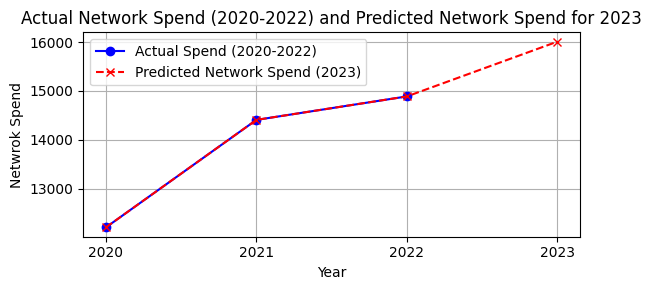

In [61]:
# Step 6: Plot the actual and predicted values
plt.figure(figsize=(6, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Network Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Netwrok Spend')
plt.title('Actual Network Spend (2020-2022) and Predicted Network Spend for 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [62]:
# Step 7: Model Evaluation

# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.08929244090907736
Mean Absolute Percentage Error (MAPE): 0.000357400802654046
R-squared (R2): 0.9999999999942809


In [63]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100}%')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.08929244090907736
Mean Absolute Percentage Error (MAPE): 0.0357400802654046%
R-squared (R²): 0.9999999999942809


Mean Squared Error (MSE): 0.0893

The average of the squared differences between the predicted and actual values, indicating very small prediction errors.

Mean Absolute Percentage Error (MAPE): 0.0357%

On average, the model's predictions deviate by only 0.0357% from the actual values, showing a high level of accuracy.

R-squared (R²): 0.9999999999942809

The model explains nearly 100% of the variance in the data, indicating a near-perfect fit.

**Over All:** Linear Regression is Good here for Network Spend data.

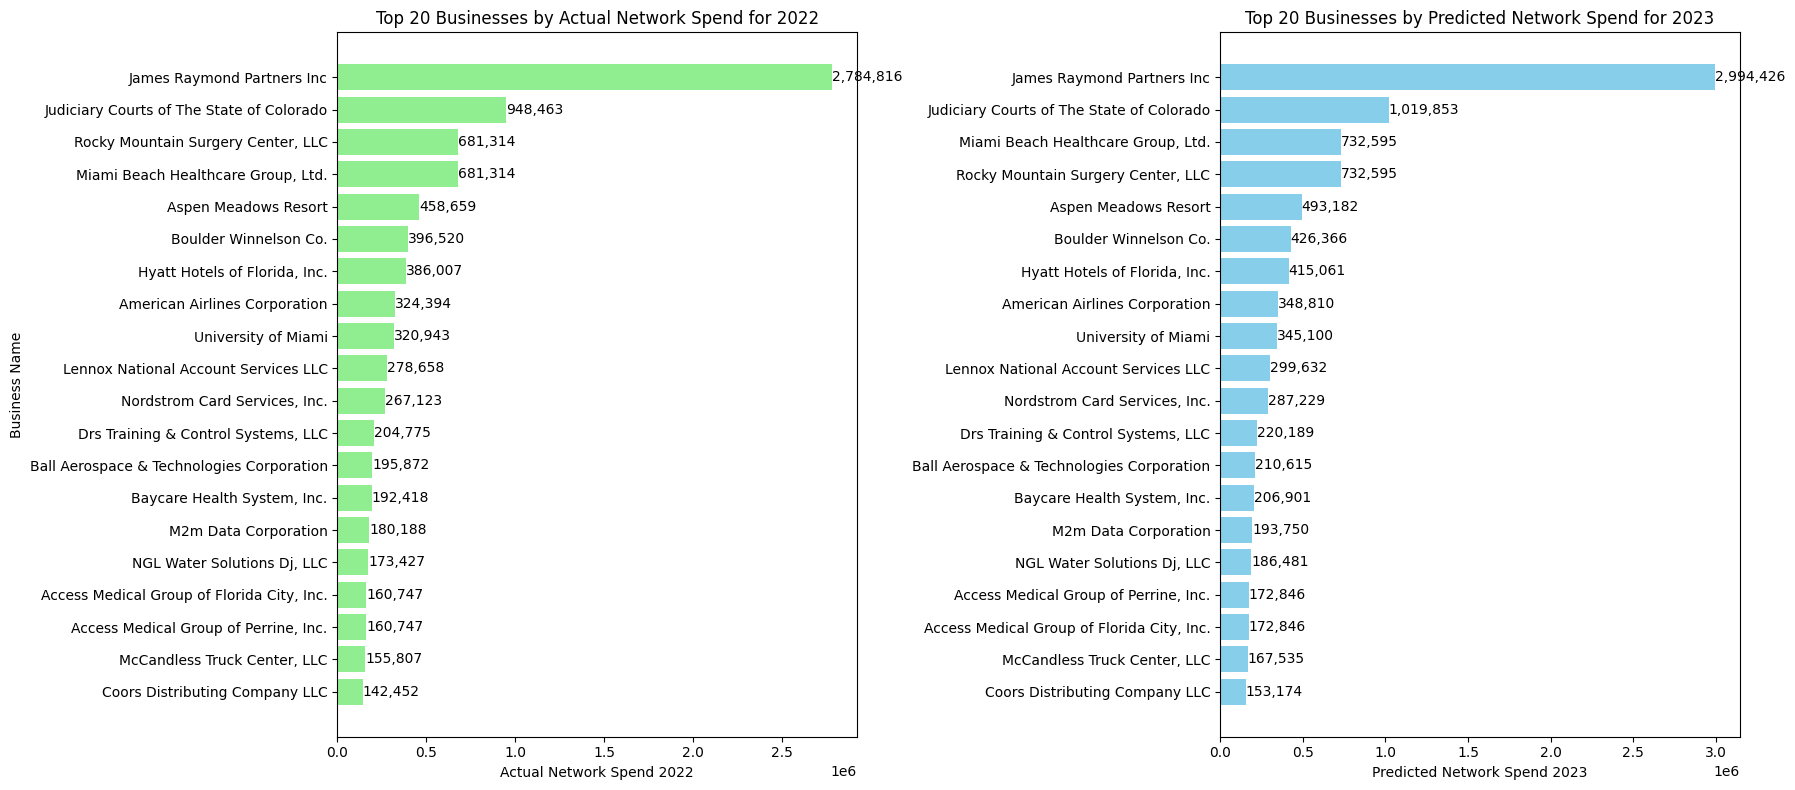

In [64]:
# Now lets create a DataFrame for Top 20 Businesses by Predicted Network Spend for 2023 and Actual Network Spend for 2022 in Side by side Bar graph
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame for Top 20 Businesses by Actual Network Spend for 2022
top_20_actual_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names from the test set
    'EST_NETWORK_SPEND_2022': X_test['EST_NETWORK_SPEND_2022']  # Actual network spend for 2022
}).sort_values(by='EST_NETWORK_SPEND_2022', ascending=False).head(20)

# Create DataFrame for Top 20 Businesses by Predicted Network Spend for 2023
top_20_predicted_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names from the test set
    'EST_NETWORK_SPEND_2023_Predicted': predictions['EST_NETWORK_SPEND_2023']  # Predicted network spend for 2023
}).sort_values(by='EST_NETWORK_SPEND_2023_Predicted', ascending=False).head(20)

# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_actual_2022 = axes[0].barh(top_20_actual_2022['Business_Name'], top_20_actual_2022['EST_NETWORK_SPEND_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_actual_2022:
    axes[0].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the first plot (Actual 2022)
axes[0].set_title('Top 20 Businesses by Actual Network Spend for 2022')
axes[0].set_xlabel('Actual Network Spend 2022')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2023
bars_predicted_2023 = axes[1].barh(top_20_predicted_2023['Business_Name'], top_20_predicted_2023['EST_NETWORK_SPEND_2023_Predicted'], color='skyblue')

# Add values at the end of each bar for 2023
for bar in bars_predicted_2023:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Predicted 2023)
axes[1].set_title('Top 20 Businesses by Predicted Network Spend for 2023')
axes[1].set_xlabel('Predicted Network Spend 2023')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [65]:
# Step 1: Import necessary libraries - Security Spend 2023
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [66]:
# Step 1 - Load the data (Security Spend)
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data.columns)

Index(['Business_Name', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS',
       'REV_AMT_2022', 'REV_AMT_2021', 'REV_AMT_2020',
       'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
       'EST_NETWORK_SPEND_2020', 'EST_SECURITY_SPEND_2022',
       'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2020',
       'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
       'EST_SERVICES_SPEND_2020', 'EST_VOICE_SPEND_2022',
       'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2020',
       'EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023',
       'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023', 'REV_AMT_2023',
       'REV_AMT_2024', 'EST_NETWORK_SPEND_2024', 'EST_SECURITY_SPEND_2024',
       'EST_VOICE_SPEND_2024', 'EST_SERVICES_SPEND_2024'],
      dtype='object')


In [67]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [68]:
# Step 2: Prepare data - Load Security Spend Data
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_SECURITY_SPEND_2020', 'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2022']
target = ['EST_SECURITY_SPEND_2023']

In [69]:
# Step 3: Prepare the data
# Assuming features_lr is already defined and contains the appropriate columns
X = data[features_lr]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Verify that null values have been removed
print(X_train.isnull().sum())

EMPLOYEES_HERE             0
EMPLOYEES_TOTAL            0
ACTIVE_LOC_EMPS            0
EST_SECURITY_SPEND_2020    0
EST_SECURITY_SPEND_2021    0
EST_SECURITY_SPEND_2022    0
dtype: int64


In [71]:
# Step 4: Predict Security Spend for 2023
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target])  # Train on each target variable
    y_pred = lr_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [72]:
# Convert predictions and actuals to DataFrame for easier comparison
#y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [73]:
# Step 5: Trend Line Chat (Both Actual & Predicted Revenue Years Data) - Combine actual values (2020-2022) and predicted values (2023) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_SECURITY_SPEND_2020'].values
values_actual_2021 = X_test['EST_SECURITY_SPEND_2021'].values
values_actual_2022 = X_test['EST_SECURITY_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2023.mean()]

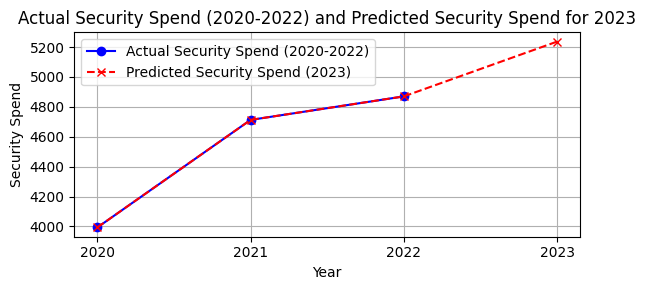

In [74]:
# Plot the actual and predicted values
plt.figure(figsize=(6, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Security Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Security Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Security Spend')
plt.title('Actual Security Spend (2020-2022) and Predicted Security Spend for 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [75]:
# Step 6: Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100}%')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.09179474701170624
Mean Absolute Percentage Error (MAPE): 433270841610398.6%
R-squared (R²): 0.9999999998762025


**Mean Squared Error (MSE)**: 0.0918

  The average of the squared differences between the predicted and actual values remains small, indicating low prediction errors, similar to the previous case.

**Mean Absolute Percentage Error (MAPE)**: 433270841610398.6%

  This extremely large MAPE indicates a significant issue. The percentage error seems astronomically high, which usually occurs when the actual values are very close to zero, leading to inflated percentage errors. It suggests the model's predictions might be severely off in some cases.

**R-squared (R²)**: 0.9999999998762025

  Despite the MAPE issue, the R-squared is still very close to 1, meaning the model still explains almost all the variability in the data.

**OverAll**: Linear Regression is working fine for Security Spend data.

In [76]:
# Step 1: Import necessary libraries - Voice Spend 2023
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [77]:
# Step 2 - Load and Prepare data
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
#print(data.columns)

# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [78]:
# Step 3: Initiate Model Building - Using Yearly Voice spend data to Predict for 2023
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','EST_VOICE_SPEND_2020', 'EST_VOICE_SPEND_2021','EST_VOICE_SPEND_2022']
target = ['EST_VOICE_SPEND_2023']

In [79]:
# Test & Train Dataset
X = data[features_lr]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

In [80]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])
    y_pred = lr_model.predict(X_test)
    predictions[target_name] = y_pred

In [81]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [82]:
# Step 4: Trend Line Chat (Both Actual & Predicted Revenue Years Data) - Combine actual values (2020-2022) and predicted values (2023) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_VOICE_SPEND_2020'].values
values_actual_2021 = X_test['EST_VOICE_SPEND_2021'].values
values_actual_2022 = X_test['EST_VOICE_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2023.mean()]

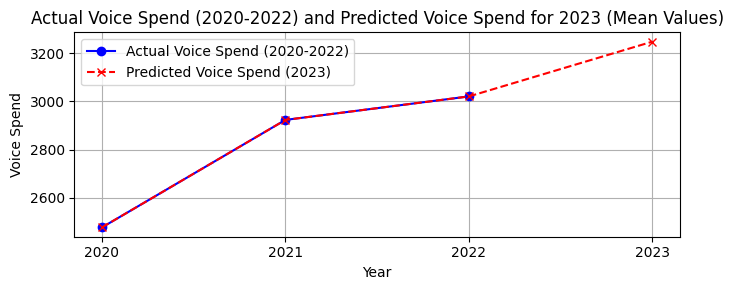

In [83]:
# Step 5: Plot the actual and predicted values
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Voice Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Voice Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Voice Spend')
plt.title('Actual Voice Spend (2020-2022) and Predicted Voice Spend for 2023 (Mean Values)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [84]:
# Step 6: Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.18864063391254443
Mean Absolute Percentage Error (MAPE): 0.002511592321042915
R-squared (R2): 0.9999999995361243


MSE (0.1886): Very small prediction errors, indicating high accuracy.

MAPE (0.0025%): Extremely low percentage error, suggesting excellent predictive performance.

R² (0.9999999995): The model explains nearly all of the variance, indicating an almost perfect fit.

**OverAll**: Linear Regression is doing good here for Voice Spend data.

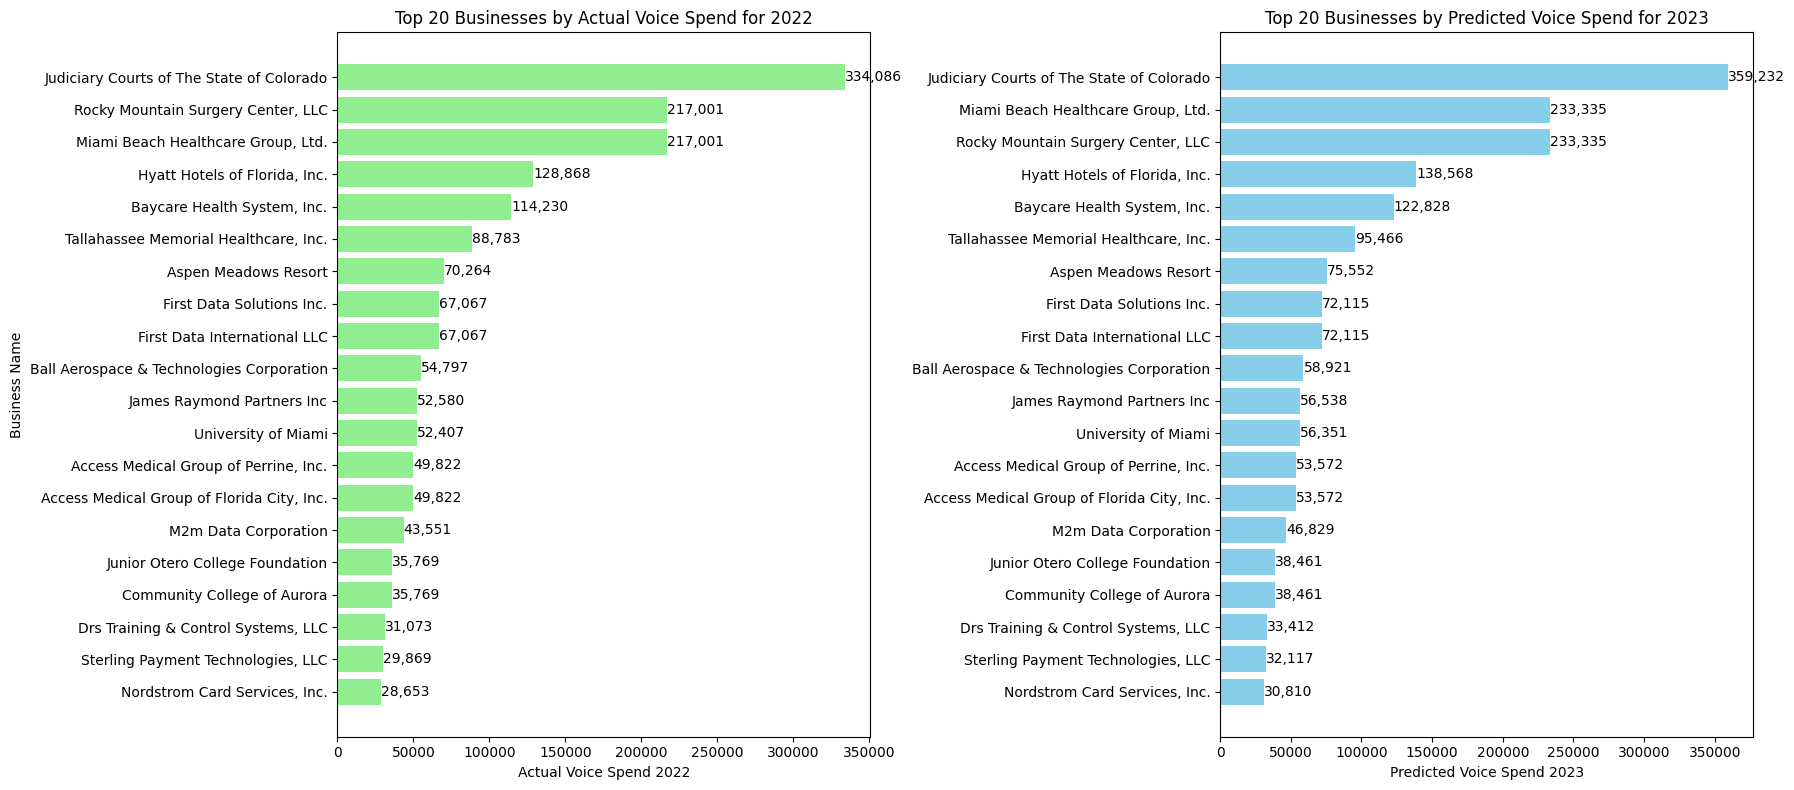

In [85]:
# Now lets create a DataFrame for Top 20 Businesses by Predicted Voice Spend for 2023 and Actual Voice Spend for 2022 in Side by side Bar graph
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame for Top 20 Businesses by Actual Voice Spend for 2022
top_20_actual_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names from the test set
    'EST_VOICE_SPEND_2022': X_test['EST_VOICE_SPEND_2022']  # Actual network spend for 2022
}).sort_values(by='EST_VOICE_SPEND_2022', ascending=False).head(20)

# Create DataFrame for Top 20 Businesses by Predicted Voice Spend for 2023
top_20_predicted_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'EST_VOICE_SPEND_2023_Predicted': predictions['EST_VOICE_SPEND_2023']
}).sort_values(by='EST_VOICE_SPEND_2023_Predicted', ascending=False).head(20)

# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar Graph for Top 20 Businesses by Actual Voice Spend for 2022
bars_actual_2022 = axes[0].barh(top_20_actual_2022['Business_Name'], top_20_actual_2022['EST_VOICE_SPEND_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_actual_2022:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Actual 2022)
axes[0].set_title('Top 20 Businesses by Actual Voice Spend for 2022')
axes[0].set_xlabel('Actual Voice Spend 2022')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()

# Bar Graph for Top 20 Businesses by Predicted Voice Spend for 2023
bars_predicted_2023 = axes[1].barh(top_20_predicted_2023['Business_Name'], top_20_predicted_2023['EST_VOICE_SPEND_2023_Predicted'], color='skyblue')

# Add values at the end of each bar for 2023
for bar in bars_predicted_2023:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Predicted 2023)
axes[1].set_title('Top 20 Businesses by Predicted Voice Spend for 2023')
axes[1].set_xlabel('Predicted Voice Spend 2023')
axes[1].invert_yaxis()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [86]:
# Step 1: Import necessary libraries - For Services Spend
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [87]:
# Step 2 - Load the data Services Spend
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
#print(data.columns)

# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [88]:
# Step 3: Prepare data - Using Yearly Services spend data to Predict for 2023
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','EST_SERVICES_SPEND_2020', 'EST_SERVICES_SPEND_2021','EST_SERVICES_SPEND_2022']
target = ['EST_SERVICES_SPEND_2023']

In [89]:
# Step 4 - Initilize Linear Regression Model
X = data[features_lr]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run Linear Regression model
lr_model = LinearRegression()

In [90]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])
    y_pred = lr_model.predict(X_test)
    predictions[target_name] = y_pred

In [91]:
# Step 5: Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [92]:
# Step 6: Trend Line Chat (Both Actual & Predicted Revenue Years Data) - Combine actual values (2020-2022) and predicted values (2023) for all samples
values_actual_2020 = X_test['EST_SERVICES_SPEND_2020'].values
values_actual_2021 = X_test['EST_SERVICES_SPEND_2021'].values
values_actual_2022 = X_test['EST_SERVICES_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

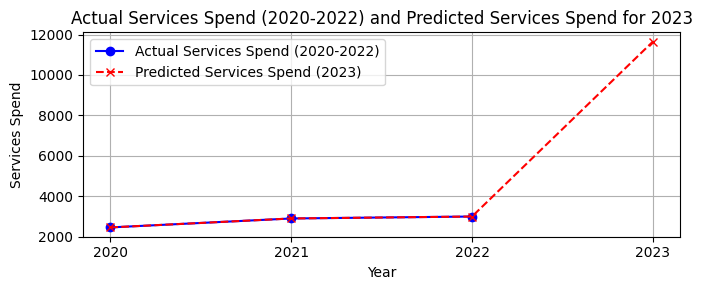

In [93]:
# Step 7: Plot the actual and predicted values
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Services Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Services Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Services Spend')
plt.title('Actual Services Spend (2020-2022) and Predicted Services Spend for 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [94]:
# Step 8: Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)

mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.0330873844176271
Mean Absolute Percentage Error (MAPE): 782291398867.7522
R-squared (R2): 0.9999999998920427


MSE (0.0331): Very small prediction errors, indicating high accuracy.

MAPE (782291398867.75%): The extremely high percentage error suggests significant issues with predictions, likely due to near-zero actual values.

R² (0.9999999999): The model explains almost all of the variance in the data, showing a near-perfect fit.

**OverAll**: Linear Regression is doing fine here for Services data.

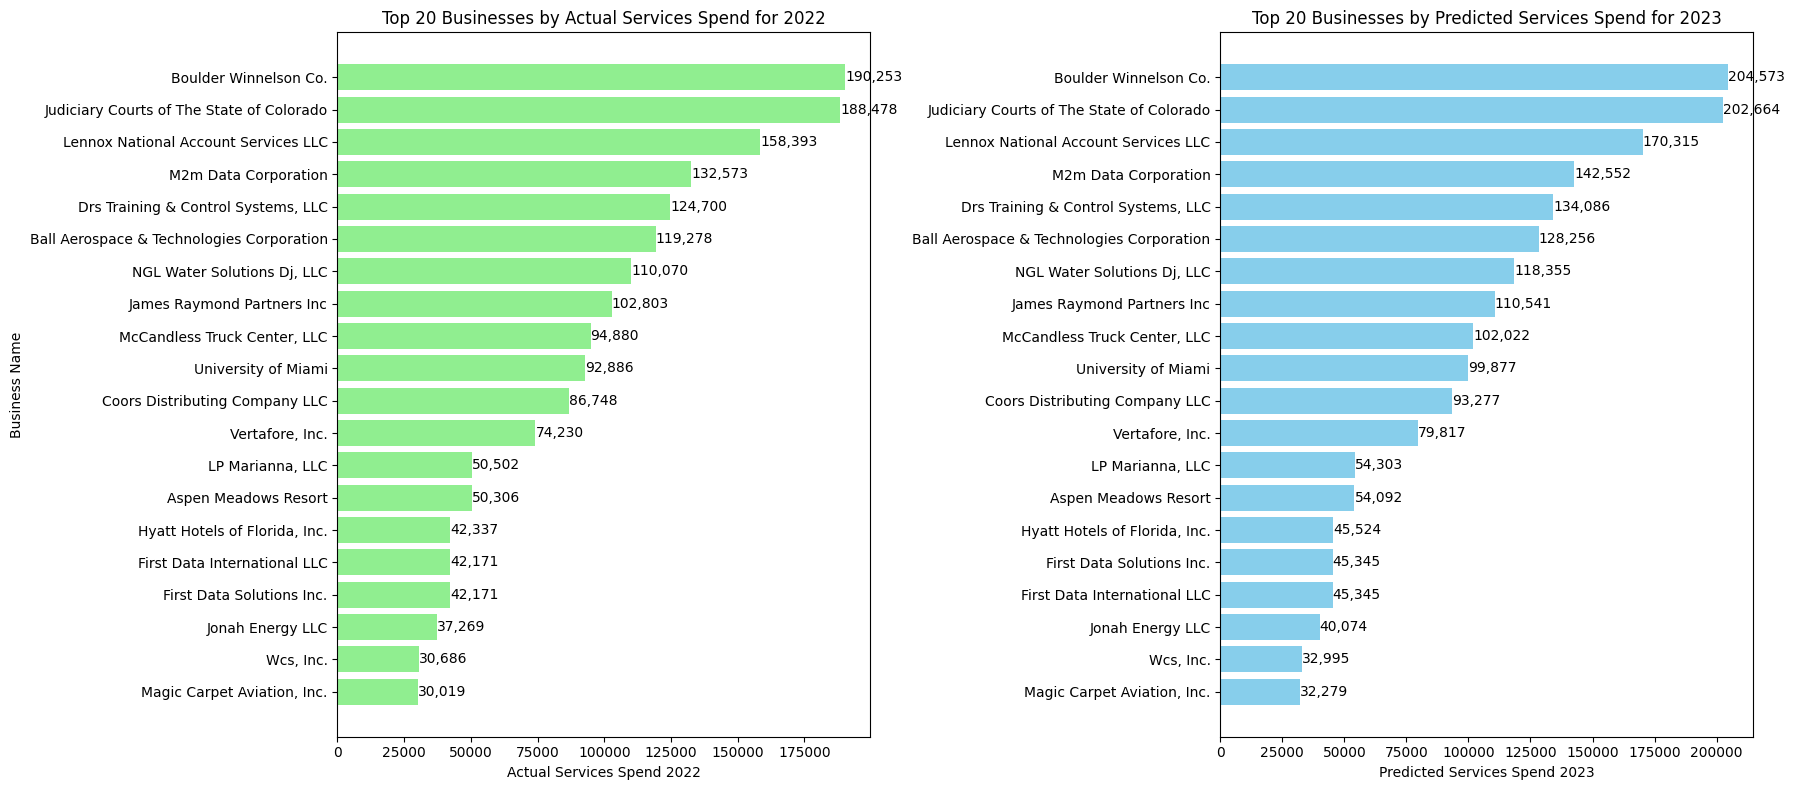

In [95]:
# Now lets create a DataFrame for Top 20 Businesses by Predicted Services Spend for 2023 and Actual Services Spend for 2022 in Side by side Bar graph
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame for Top 20 Businesses by Actual Services Spend for 2022
top_20_actual_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names from the test set
    'EST_SERVICES_SPEND_2022': X_test['EST_SERVICES_SPEND_2022']  # Actual network spend for 2022
}).sort_values(by='EST_SERVICES_SPEND_2022', ascending=False).head(20)

# Create DataFrame for Top 20 Businesses by Predicted Services Spend for 2023
top_20_predicted_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'EST_SERVICES_SPEND_2023_Predicted': predictions['EST_SERVICES_SPEND_2023']
}).sort_values(by='EST_SERVICES_SPEND_2023_Predicted', ascending=False).head(20)

# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar Graph for Top 20 Businesses by Actual Services Spend for 2022
bars_actual_2022 = axes[0].barh(top_20_actual_2022['Business_Name'], top_20_actual_2022['EST_SERVICES_SPEND_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_actual_2022:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Actual 2022)
axes[0].set_title('Top 20 Businesses by Actual Services Spend for 2022')
axes[0].set_xlabel('Actual Services Spend 2022')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()

# Bar Graph for Top 20 Businesses by Predicted Voice Spend for 2023
bars_predicted_2023 = axes[1].barh(top_20_predicted_2023['Business_Name'], top_20_predicted_2023['EST_SERVICES_SPEND_2023_Predicted'], color='skyblue')

# Add values at the end of each bar for 2023
for bar in bars_predicted_2023:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Predicted 2023)
axes[1].set_title('Top 20 Businesses by Predicted Services Spend for 2023')
axes[1].set_xlabel('Predicted Services Spend 2023')
axes[1].invert_yaxis()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Random Forest - Spend Prediction 2023 (Network, Security, Voice and Services)**

In [96]:
# Random Forest - Network Spend
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [97]:
# Step1: Load the data
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
#print(data)

# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [98]:
# Step 2: Prepare data
features_rf = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_NETWORK_SPEND_2020', 'EST_NETWORK_SPEND_2021', 'EST_NETWORK_SPEND_2022']
target = ['EST_NETWORK_SPEND_2023']

# Step3 - Prepration for RandomForest Model - Train-Test Split
X = data[features_rf]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model for each target variable
predictions = {}
for target_name in target:
    rf_model.fit(X_train, y_train[target_name])
    y_pred = rf_model.predict(X_test)
    predictions[target_name] = y_pred

In [100]:
# Step 03: Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [101]:
# Step 04: Trend Line Chat - Combine actual values (2020-2022) and predicted values (2023) for all samples

values_actual_2020 = X_test['EST_NETWORK_SPEND_2020'].values
values_actual_2021 = X_test['EST_NETWORK_SPEND_2021'].values
values_actual_2022 = X_test['EST_NETWORK_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2023.mean()]

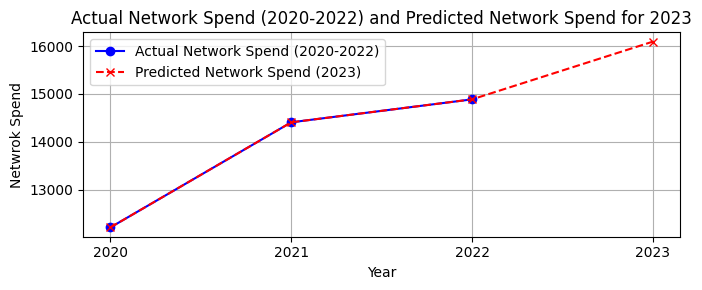

In [102]:
# Step 5: Plot the actual and predicted values
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Network Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Network Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Netwrok Spend')
plt.title('Actual Network Spend (2020-2022) and Predicted Network Spend for 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [103]:
# Step 6: Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 12310474.102156892
Mean Absolute Percentage Error (MAPE): 0.0016741009936264866
R-squared (R2): 0.9992115197272484


MSE (12,310,474.10): Relatively large prediction errors, indicating notable deviations between actual and predicted values.

MAPE (0.0017%): Very low percentage error, showing the model’s predictions are highly accurate on average.

R² (0.9992): The model explains nearly all of the variance in the data, indicating a very strong fit.

**OverAll**: Random Forest is doing okay here for Network Spend data.

In [104]:
# Step 07: Now Load the Security Spend data
features_rf = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_SECURITY_SPEND_2020', 'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2022']
target = ['EST_SECURITY_SPEND_2023']

# Step3 - Prepration for RandomForest Model - Train-Test Split
X = data[features_rf]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Step 08: Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model for each target variable
predictions = {}
for target_name in target:
    rf_model.fit(X_train, y_train[target_name])
    y_pred = rf_model.predict(X_test)
    predictions[target_name] = y_pred

In [106]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [107]:
# Step 09: Trend Line Chat - Combine actual values (2020-2022) and predicted values (2023) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_SECURITY_SPEND_2020'].values
values_actual_2021 = X_test['EST_SECURITY_SPEND_2021'].values
values_actual_2022 = X_test['EST_SECURITY_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2023.mean()]

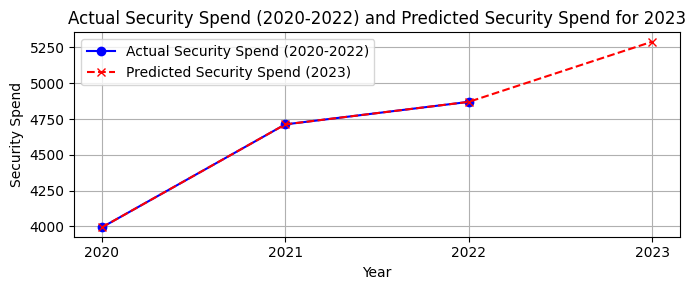

In [108]:
# Step 10: Plot the actual and predicted values
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Security Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Security Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Security Spend')
plt.title('Actual Security Spend (2020-2022) and Predicted Security Spend for 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [109]:
# Step 11: Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 904801.3007237068
Mean Absolute Percentage Error (MAPE): 0.0032746264759427814
R-squared (R2): 0.9987797545625771


MSE (904,801.30): Moderately large prediction errors, showing some deviations between actual and predicted values.

MAPE (0.0033%): Very low percentage error, indicating highly accurate predictions.

R² (0.9988): The model explains nearly all of the variance in the data, indicating a strong fit.

**Despite the high MSE**, the low MAPE and high R² suggest the Random Forest model performs well overall for Security spend data.

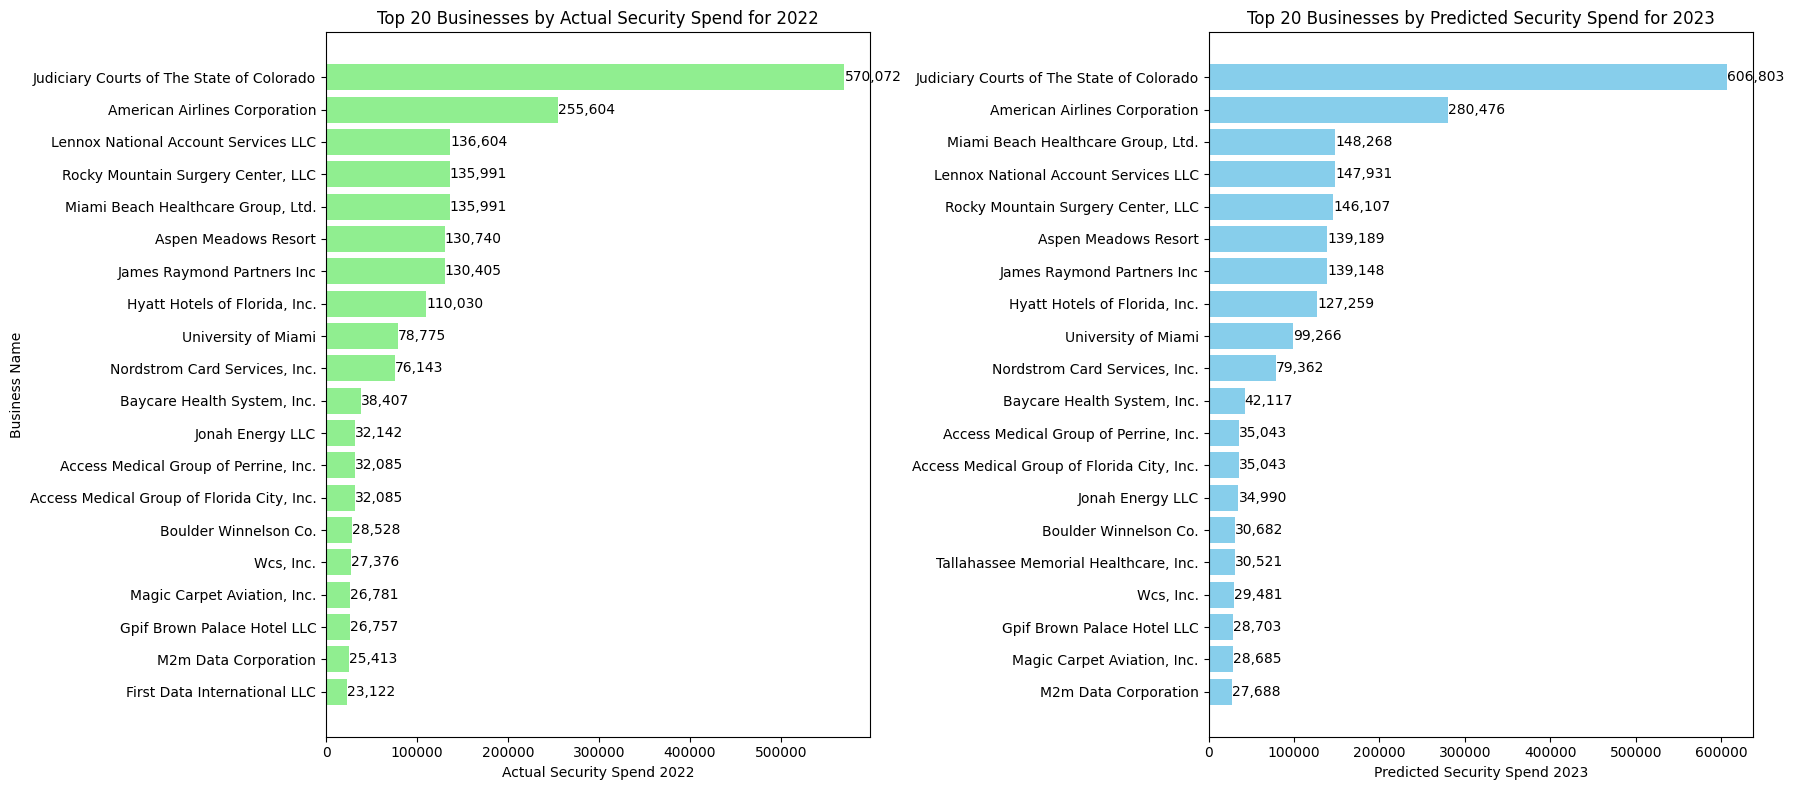

In [110]:
# Now lets create a DataFrame for Top 20 Businesses by Predicted Security Spend for 2023 and Actual Security Spend for 2022 in Side by side Bar graph
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame for Top 20 Businesses by Actual Security Spend for 2022
top_20_actual_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names from the test set
    'EST_SECURITY_SPEND_2022': X_test['EST_SECURITY_SPEND_2022']
}).sort_values(by='EST_SECURITY_SPEND_2022', ascending=False).head(20)

# Create DataFrame for Top 20 Businesses by Predicted Services Spend for 2023
top_20_predicted_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'EST_SECURITY_SPEND_2023_Predicted': predictions['EST_SECURITY_SPEND_2023']
}).sort_values(by='EST_SECURITY_SPEND_2023_Predicted', ascending=False).head(20)

# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar Graph for Top 20 Businesses by Actual Security Spend for 2022
bars_actual_2022 = axes[0].barh(top_20_actual_2022['Business_Name'], top_20_actual_2022['EST_SECURITY_SPEND_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_actual_2022:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Actual 2022)
axes[0].set_title('Top 20 Businesses by Actual Security Spend for 2022')
axes[0].set_xlabel('Actual Security Spend 2022')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()

# Bar Graph for Top 20 Businesses by Predicted Security Spend for 2023
bars_predicted_2023 = axes[1].barh(top_20_predicted_2023['Business_Name'], top_20_predicted_2023['EST_SECURITY_SPEND_2023_Predicted'], color='skyblue')

# Add values at the end of each bar for 2023
for bar in bars_predicted_2023:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Predicted 2023)
axes[1].set_title('Top 20 Businesses by Predicted Security Spend for 2023')
axes[1].set_xlabel('Predicted Security Spend 2023')
axes[1].invert_yaxis()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [111]:
# Now Load and process the Voice Spend data
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [112]:
# Step 12: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_rf = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_VOICE_SPEND_2020', 'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2022']
target = ['EST_VOICE_SPEND_2023']

# Step3 - Prepration for RandomForest Model - Train-Test Split
X = data[features_rf]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model for each target variable
predictions = {}
for target_name in target:
    rf_model.fit(X_train, y_train[target_name])
    y_pred = rf_model.predict(X_test)
    predictions[target_name] = y_pred

In [114]:
# Step 13: Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [115]:
# Step 14: Trend Line Chat - Combine actual values (2020-2022) and predicted values (2023) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_VOICE_SPEND_2020'].values
values_actual_2021 = X_test['EST_VOICE_SPEND_2021'].values
values_actual_2022 = X_test['EST_VOICE_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2023.mean()]

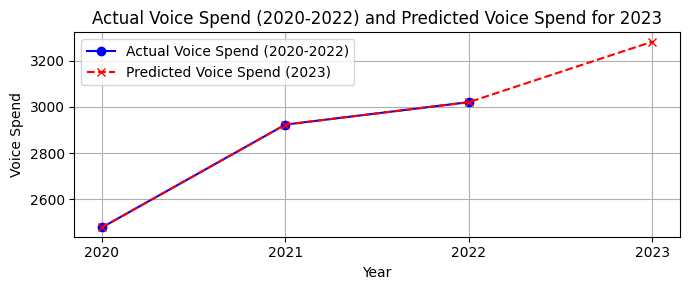

In [116]:
# Step 15: Plot the actual and predicted values
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Voice Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Voice Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Voice Spend')
plt.title('Actual Voice Spend (2020-2022) and Predicted Voice Spend for 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [117]:
# Step 16: Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 167769.58387626483
Mean Absolute Percentage Error (MAPE): 0.0018306661082671863
R-squared (R2): 0.9995874470929559


MSE (167769.58): The prediction errors are relatively large, indicating some significant deviations between predicted and actual values.

MAPE (0.0018%): The model is highly accurate in terms of percentage errors, showing very small deviations.

R² (0.9996): The model explains almost all of the variance in the data, indicating a strong fit.

**Despite the high MSE**, the low MAPE and high R² suggest the Random Forest model performs well overall for Voice spend data.

In [118]:
# Step 17: Load and process the Services Spend data
features_rf = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_SERVICES_SPEND_2020', 'EST_SERVICES_SPEND_2021', 'EST_SERVICES_SPEND_2022']
target = ['EST_SERVICES_SPEND_2023']

# Step3 - Prepration for RandomForest Model - Train-Test Split
X = data[features_rf]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model for each target variable
predictions = {}
for target_name in target:
    rf_model.fit(X_train, y_train[target_name])
    y_pred = rf_model.predict(X_test)
    predictions[target_name] = y_pred

In [120]:
# Step 18: Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [121]:
# Trend Line Chat - Combine actual values (2020-2022) and predicted values (2023) for all samples
values_actual_2020 = X_test['EST_SERVICES_SPEND_2020'].values
values_actual_2021 = X_test['EST_SERVICES_SPEND_2021'].values
values_actual_2022 = X_test['EST_SERVICES_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

In [122]:
# Step 19: Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2023.mean()]

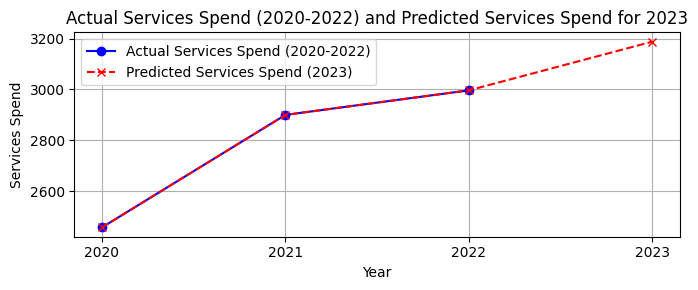

In [123]:
# Plot the actual and predicted values
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Services Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Services Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Services Spend')
plt.title('Actual Services Spend (2020-2022) and Predicted Services Spend for 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [124]:
# Step 20: Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 757839.8000023954
Mean Absolute Percentage Error (MAPE): 21353763680848.758
R-squared (R2): 0.9975273249221491


MSE (757839.80): There are significant prediction errors.

MAPE (21353763680848.76%): The percentage error is astronomically high, indicating major issues with predictions, likely due to small actual values.

R² (0.9975): The model explains most of the variance in the data, but not as perfectly as before.

**Note:** Random Forest is not doing good for Services spend data.

**Gradient Boosting - Spend Prediction 2023 (Network, Security, Voice & Services)**

In [125]:
# Import necessary libraries - XGBoost
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [126]:
# Step1: Load Network spend data from actual file name
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
#print(data)
# Print the number of null values in each column
print(data.isnull().sum())

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [127]:
# Remove rows with any null values
data = data.dropna()

In [128]:
# Verify that null values have been removed
print(data.isnull().sum())

Business_Name              0
EMPLOYEES_HERE             0
EMPLOYEES_TOTAL            0
ACTIVE_LOC_EMPS            0
REV_AMT_2022               0
REV_AMT_2021               0
REV_AMT_2020               0
EST_NETWORK_SPEND_2022     0
EST_NETWORK_SPEND_2021     0
EST_NETWORK_SPEND_2020     0
EST_SECURITY_SPEND_2022    0
EST_SECURITY_SPEND_2021    0
EST_SECURITY_SPEND_2020    0
EST_SERVICES_SPEND_2022    0
EST_SERVICES_SPEND_2021    0
EST_SERVICES_SPEND_2020    0
EST_VOICE_SPEND_2022       0
EST_VOICE_SPEND_2021       0
EST_VOICE_SPEND_2020       0
EST_NETWORK_SPEND_2023     0
EST_SECURITY_SPEND_2023    0
EST_VOICE_SPEND_2023       0
EST_SERVICES_SPEND_2023    0
REV_AMT_2023               0
REV_AMT_2024               0
EST_NETWORK_SPEND_2024     0
EST_SECURITY_SPEND_2024    0
EST_VOICE_SPEND_2024       0
EST_SERVICES_SPEND_2024    0
dtype: int64


In [129]:
# Step 2: Prepare data - Use Yearly Spend data from 2020 and 2022 to forecast 2023
features_gb = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_NETWORK_SPEND_2020', 'EST_NETWORK_SPEND_2021', 'EST_NETWORK_SPEND_2022']
target = ['EST_NETWORK_SPEND_2023']

In [130]:
# Train-Test Split
X = data[features_gb]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [131]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    xgb_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = xgb_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [132]:
# Step3: Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [133]:
# Trend Line Chat - Combine actual values (2020-2022) and predicted values (2023) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_NETWORK_SPEND_2020'].values
values_actual_2021 = X_test['EST_NETWORK_SPEND_2021'].values
values_actual_2022 = X_test['EST_NETWORK_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

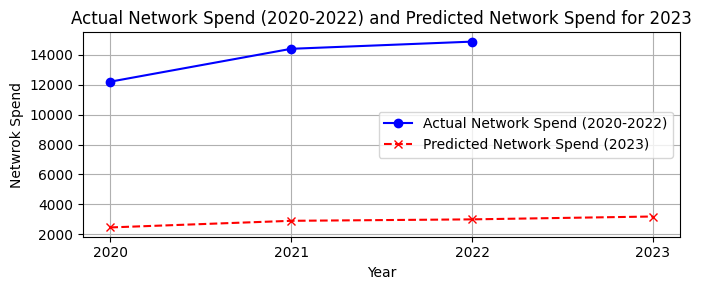

In [134]:
# Step 4: Plot the actual and predicted values
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Network Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Network Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Netwrok Spend')
plt.title('Actual Network Spend (2020-2022) and Predicted Network Spend for 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [135]:
# Step5: Model Evaluation - MSE, MAPE & R Square
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 90294262.18890527
Mean Absolute Percentage Error (MAPE): 0.07885604902102043
R-squared (R2): 0.9942166935336683


MSE (90294262.19): Prediction errors are quite large, indicating notable differences between actual and predicted values.

MAPE (0.0789%): Despite the high MSE, the percentage error is relatively low, meaning the model remains fairly accurate.

R² (0.9942): The model still explains a large portion of the variance, showing a good fit to the data.

**Note**: Here Gradient Boost is working fine for Network spend data, but not as expected.

In [136]:
# Step6: Prepare data - Use Yearly Security Spend data from 2020 and 2022 to forecast 2023
features_gb = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_SECURITY_SPEND_2020', 'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2022']
target = ['EST_SECURITY_SPEND_2023']

In [137]:
# Step7: Train-Test Split
X = data[features_gb]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step2: Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [138]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    xgb_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = xgb_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [139]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [140]:
# Step8: Trend Line Chat (Both Actual & Predicted Revenue Years Data) - Combine actual values (2020-2022) and predicted values (2023) for all samples
# The actual values will be taken from the test data set
values_actual_2020 = X_test['EST_SECURITY_SPEND_2020'].values
values_actual_2021 = X_test['EST_SECURITY_SPEND_2021'].values
values_actual_2022 = X_test['EST_SECURITY_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

In [141]:
# Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2023.mean()]

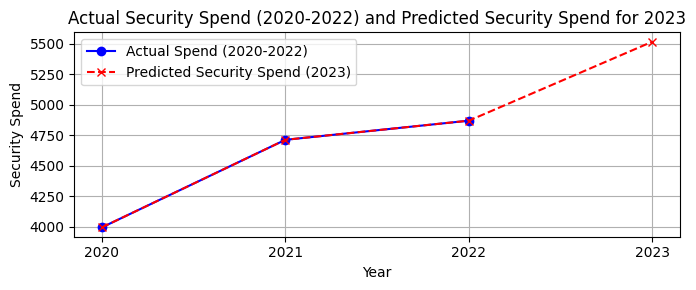

In [142]:
# Plot the actual and predicted values
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Security Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Security Spend')
plt.title('Actual Security Spend (2020-2022) and Predicted Security Spend for 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [143]:
# Step 9: Model Evaluation - MSE, MAPE & R Square
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 72093468.403541
Mean Absolute Percentage Error (MAPE): 1.2984071112195642e+16
R-squared (R2): 0.902772326015612


In [144]:
# Step 9: Now Load and Prepare data - Voice Spend Yearly Spend data from 2020 and 2022 to forecast 2023
features_gb = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_VOICE_SPEND_2020', 'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2022']
target = ['EST_VOICE_SPEND_2023']

In [145]:
# Step 10: Train-Test Split and Execute Model
X = data[features_gb]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [146]:
# Step 11: Train the model for each target variable
predictions = {}
for target_name in target:
    xgb_model.fit(X_train, y_train[target_name])
    y_pred = xgb_model.predict(X_test)
    predictions[target_name] = y_pred

In [147]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [148]:
# Step 12: Trend Line Chat - Combine actual values (2020-2022) and predicted values (2023) for all samples
values_actual_2020 = X_test['EST_VOICE_SPEND_2020'].values
values_actual_2021 = X_test['EST_VOICE_SPEND_2021'].values
values_actual_2022 = X_test['EST_VOICE_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2023.mean()]

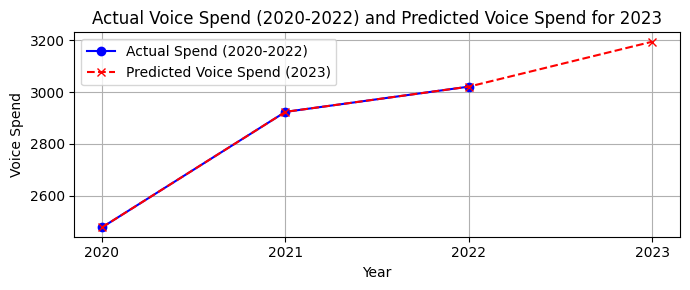

In [149]:
# Step 13: Plot the actual and predicted values
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Voice Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Voice Spend')
plt.title('Actual Voice Spend (2020-2022) and Predicted Voice Spend for 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [150]:
# Step 14: Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 13251563.345312169
Mean Absolute Percentage Error (MAPE): 0.2222244736370829
R-squared (R2): 0.9674138133106427


MSE: 13,251,563.35 — The model's average squared error, indicating how much predictions deviate from actual values.

MAPE: 22.22% — On average, the model's predictions are off by 22.22%.

R²: 0.9674 — The model explains 96.74% of the variance in the target variable, indicating a strong fit.

**Overall**, the model has a high accuracy but still shows some error in the predictions for Voice spend data.

In [151]:
# Step 15: Now load & Prepare the data for Services Spend - Use Yearly Spend data from 2020 and 2022 to forecast 2023
features_gb = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_SERVICES_SPEND_2020', 'EST_SERVICES_SPEND_2021', 'EST_SERVICES_SPEND_2022']
target = ['EST_SERVICES_SPEND_2023']

In [152]:
# Step 16: Train-Test Split and Build Model
X = data[features_gb]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model for each target variable
predictions = {}
for target_name in target:
    xgb_model.fit(X_train, y_train[target_name])
    y_pred = xgb_model.predict(X_test)
    predictions[target_name] = y_pred

In [153]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [154]:
# Step 17: Trend Line Chat - Combine actual values (2020-2022) and predicted values (2023) for all samples

values_actual_2020 = X_test['EST_SERVICES_SPEND_2020'].values
values_actual_2021 = X_test['EST_SERVICES_SPEND_2021'].values
values_actual_2022 = X_test['EST_SERVICES_SPEND_2022'].values
values_predicted_2023 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]

predicted_value = values_predicted_2023.mean()

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

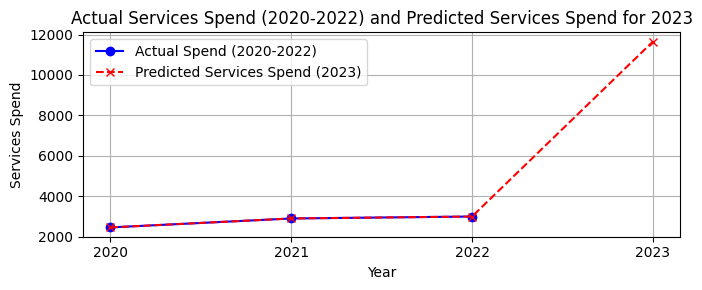

In [155]:
# Step 18: Plot the actual and predicted values
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Spend (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Services Spend (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Services Spend')
plt.title('Actual Services Spend (2020-2022) and Predicted Services Spend for 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [156]:
# Step 19: Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 39382709.6028216
Mean Absolute Percentage Error (MAPE): 1425181200527096.5
R-squared (R2): 0.871502335278741


MSE: 39,382,709.60 — The average squared error is quite large, indicating significant deviations between predictions and actual values.

MAPE: 1.425 × 10¹⁵% — This is an extremely high percentage, suggesting your model's predictions are highly inaccurate relative to the actual values.

R²: 0.8715 — The model explains about 87.15% of the variance in the target variable, which is a decent fit but not perfect.

**OverAll Observations**: Linear Regression Model is working fine for Network, Security, Voice and Services 2023 data.

Next is Random Forest Model.


**LINEAR_REGRESSION - Spend Prediction for 2024 (Network, Security, Voice, Services)**

In [157]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [158]:
# Load the data
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data.columns)

# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Index(['Business_Name', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS',
       'REV_AMT_2022', 'REV_AMT_2021', 'REV_AMT_2020',
       'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
       'EST_NETWORK_SPEND_2020', 'EST_SECURITY_SPEND_2022',
       'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2020',
       'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
       'EST_SERVICES_SPEND_2020', 'EST_VOICE_SPEND_2022',
       'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2020',
       'EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023',
       'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023', 'REV_AMT_2023',
       'REV_AMT_2024', 'EST_NETWORK_SPEND_2024', 'EST_SECURITY_SPEND_2024',
       'EST_VOICE_SPEND_2024', 'EST_SERVICES_SPEND_2024'],
      dtype='object')
Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST

In [159]:
# Step 2: Prepare data - Using Yearly Network spend data
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','EST_NETWORK_SPEND_2020', 'EST_NETWORK_SPEND_2021','EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2023']
target = ['EST_NETWORK_SPEND_2024']

In [160]:
# Step 3 - Initilize Linear Regression Model
#Assuming features_lr is already defined and contains the appropriate columns
X = data[features_lr]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
# Further verify if there is any null values
print(X_train.isnull().sum())

EMPLOYEES_HERE            0
EMPLOYEES_TOTAL           0
ACTIVE_LOC_EMPS           0
EST_NETWORK_SPEND_2020    0
EST_NETWORK_SPEND_2021    0
EST_NETWORK_SPEND_2022    0
EST_NETWORK_SPEND_2023    0
dtype: int64


In [162]:
# Step 4: Forecasting for  2024
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])
    y_pred = lr_model.predict(X_test)
    predictions[target_name] = y_pred

In [163]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [164]:
# Step 5: Visualize the data (Actual Services Spend 2020-2023 & Predicted 2024)
# Extracting actual values from X_test
values_actual_2020 = X_test['EST_NETWORK_SPEND_2020'].values
values_actual_2021 = X_test['EST_NETWORK_SPEND_2021'].values
values_actual_2022 = X_test['EST_NETWORK_SPEND_2022'].values
values_actual_2023 = X_test['EST_NETWORK_SPEND_2023'].values
values_predicted_2024 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022', '2023', '2024']
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean(),
    values_actual_2023.mean()
]

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

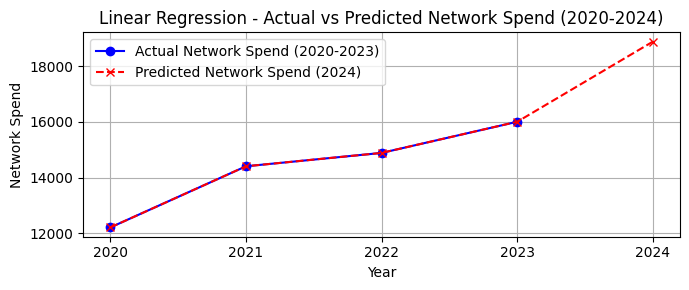

In [165]:
# Step 6: Plot the actual and predicted values without gaps
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Network Spend (2020-2023)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Network Spend (2024)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Network Spend')
plt.title('Linear Regression - Actual vs Predicted Network Spend (2020-2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [166]:
# Step 6: Model Evaluation
# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100}%')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.09197578644122252
Mean Absolute Percentage Error (MAPE): 0.03748429971917256%
R-squared (R²): 0.9999999999957692


MSE (0.092): Very low, indicating minimal prediction errors.

MAPE (0.0375%): Extremely low, showing excellent accuracy in percentage terms.

R² (0.99999999999): Nearly perfect, indicating the model explains almost all the variance in the data.

**OverAll:** Linear Regression is doing Good here.

In [167]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual Network Spend & Predicted Network Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Predicted Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_NETWORK_SPEND_2024_Predicted': predictions['EST_NETWORK_SPEND_2024']  # Predicted network spend for 2024
}).sort_values(by='EST_NETWORK_SPEND_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Actual Network Spend 2022
top_20_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_NETWORK_SPEND_2023': X_test['EST_NETWORK_SPEND_2023']
}).sort_values(by='EST_NETWORK_SPEND_2023', ascending=False).head(20)

# Calculate the total Actual spend for 2023 & Predicted spend for 2024
total_actual_spend_2023 = top_20_2023['EST_NETWORK_SPEND_2023'].sum()
total_predicted_spend_2024 = top_20_2024['EST_NETWORK_SPEND_2024_Predicted'].sum()

# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2023 = top_20_2023[top_20_2023['Business_Name'] != 'Grand Total']

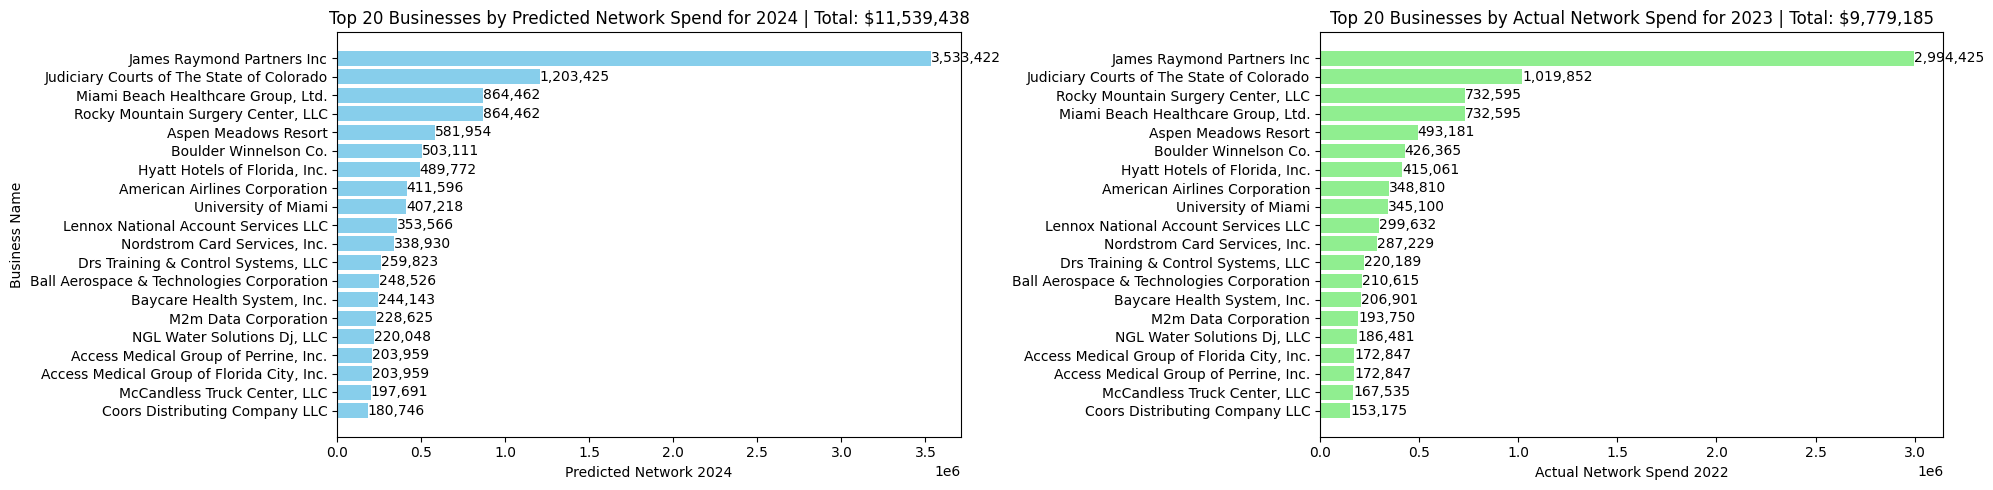

In [168]:
# Step7: Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['EST_NETWORK_SPEND_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title(f'Top 20 Businesses by Predicted Network Spend for 2024 | Total: ${total_predicted_spend_2024:,.0f}')
axes[0].set_xlabel('Predicted Network 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2023 = axes[1].barh(top_20_2023['Business_Name'], top_20_2023['EST_NETWORK_SPEND_2023'], color='lightgreen')

# Add values at the end of each bar for 2023
for bar in bars_2023:
    axes[1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2023)
#axes[1].set_title('Top 20 Businesses by Actual Network Spend for 2023')
axes[1].set_title(f'Top 20 Businesses by Actual Network Spend for 2023 | Total: ${total_actual_spend_2023:,.0f}')
axes[1].set_xlabel('Actual Network Spend 2022')
axes[1].invert_yaxis()

# Adjust layout
plt.tight_layout()
plt.show()

In [169]:
# Step 2: Prepare data - Using Yearly Security spend data
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','EST_SECURITY_SPEND_2020', 'EST_SECURITY_SPEND_2021','EST_SECURITY_SPEND_2022', 'EST_SECURITY_SPEND_2023']
target = ['EST_SECURITY_SPEND_2024']

In [170]:
# Step 3 - Initilize Linear Regression Model
X = data[features_lr]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the Linear Regression model
lr_model = LinearRegression()

In [171]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])
    y_pred = lr_model.predict(X_test)
    predictions[target_name] = y_pred

# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [172]:
# Step 5: Trend Line Chat (Both Actual & Predicted Spend Years Data) - Combine actual values (2020-2023) and predicted values (2024) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_SECURITY_SPEND_2020'].values
values_actual_2021 = X_test['EST_SECURITY_SPEND_2021'].values
values_actual_2022 = X_test['EST_SECURITY_SPEND_2022'].values
values_actual_2023 = X_test['EST_SECURITY_SPEND_2023'].values
values_predicted_2024 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023','2024']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean(),
    values_actual_2023.mean()
]

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

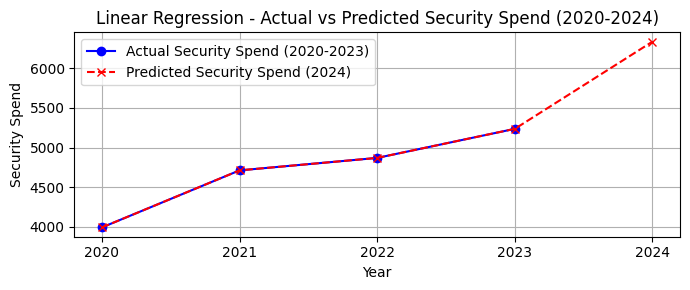

In [173]:
# Step 6: Plot the actual and predicted values without gaps
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Security Spend (2020-2023)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Security Spend (2024)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Security Spend')
plt.title('Linear Regression - Actual vs Predicted Security Spend (2020-2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [174]:
# Step 7: Model Evaluation
# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.07532883409086319
Mean Absolute Percentage Error (MAPE): 2511262639619.9307
R-squared (R2): 0.9999999999306121


In [175]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual & Predicted Security Spend for 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Predicted Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_SECURITY_SPEND_2024_Predicted': predictions['EST_SECURITY_SPEND_2024']  # Predicted network spend for 2024
}).sort_values(by='EST_SECURITY_SPEND_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Actual Network Spend 2022
top_20_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_SECURITY_SPEND_2023': X_test['EST_SECURITY_SPEND_2023']  # Actual network spend for 2022
}).sort_values(by='EST_SECURITY_SPEND_2023', ascending=False).head(20)

# Calculate the total Actual spend for 2023 & Predicted spend for 2024
total_actual_spend_2023 = top_20_2023['EST_SECURITY_SPEND_2023'].sum()
total_predicted_spend_2024 = top_20_2024['EST_SECURITY_SPEND_2024_Predicted'].sum()

# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2023 = top_20_2023[top_20_2023['Business_Name'] != 'Grand Total']

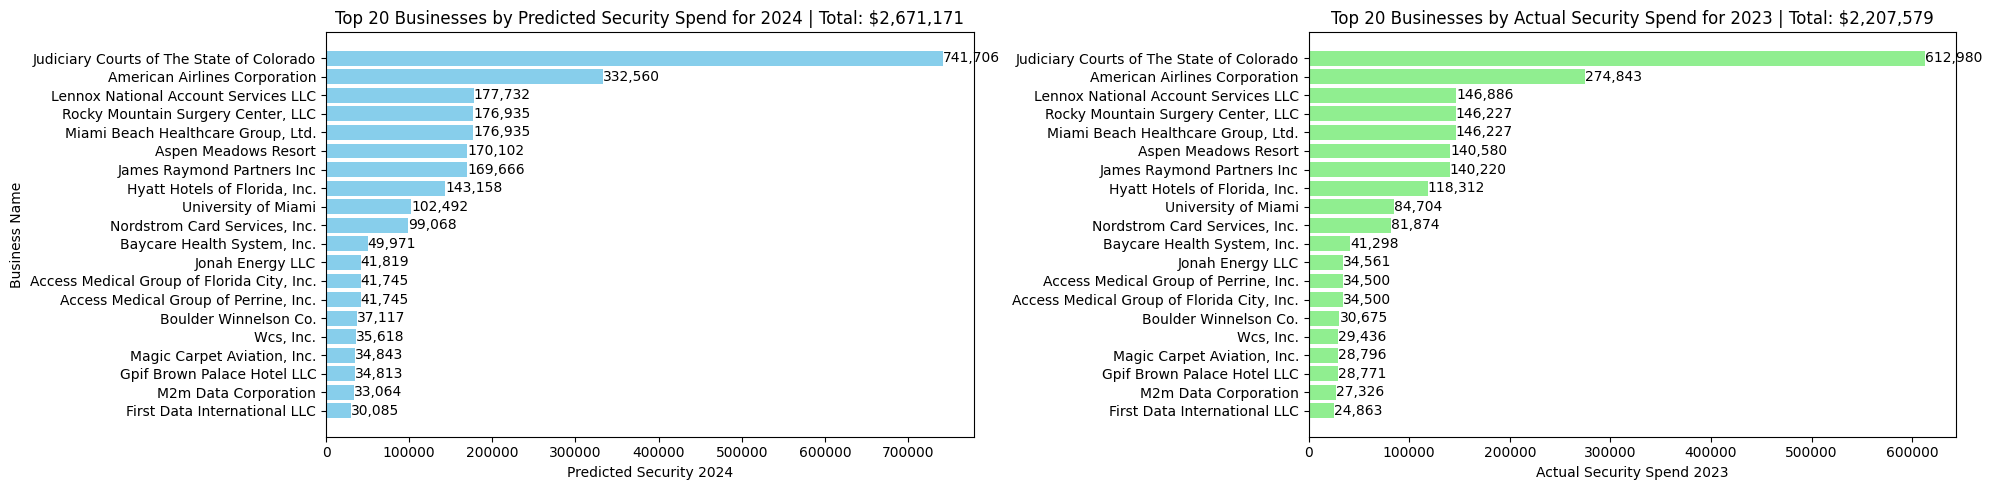

In [176]:
# Step7: Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['EST_SECURITY_SPEND_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Predicted Security Spend 2024)
axes[0].set_title(f'Top 20 Businesses by Predicted Security Spend for 2024 | Total: ${total_predicted_spend_2024:,.0f}')
axes[0].set_xlabel('Predicted Security 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()

# Bar Graph for Top 20 Businesses by Actual Security Spend for 2022
bars_2023 = axes[1].barh(top_20_2023['Business_Name'], top_20_2023['EST_SECURITY_SPEND_2023'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2023:
    axes[1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2023)
#axes[1].set_title('Top 20 Businesses by Actual Network Spend for 2023')
axes[1].set_title(f'Top 20 Businesses by Actual Security Spend for 2023 | Total: ${total_actual_spend_2023:,.0f}')
axes[1].set_xlabel('Actual Security Spend 2023')
axes[1].invert_yaxis()

# Adjust layout
plt.tight_layout()
plt.show()

In [177]:
# Step 2: Prepare data - Using Yearly Voice spend data
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','EST_VOICE_SPEND_2020', 'EST_VOICE_SPEND_2021','EST_VOICE_SPEND_2022', 'EST_VOICE_SPEND_2023']
target = ['EST_VOICE_SPEND_2024']

In [178]:
# Step 3 - Initilize Linear Regression Model
X = data[features_lr]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the Linear Regression model
lr_model = LinearRegression()

In [179]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])
    y_pred = lr_model.predict(X_test)
    predictions[target_name] = y_pred

# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [180]:
# Step 5: Trend Line Chat (Both Actual & Predicted Spend Years Data) - Combine actual values (2020-2023) and predicted values (2024) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_VOICE_SPEND_2020'].values
values_actual_2021 = X_test['EST_VOICE_SPEND_2021'].values
values_actual_2022 = X_test['EST_VOICE_SPEND_2022'].values
values_actual_2023 = X_test['EST_VOICE_SPEND_2023'].values
values_predicted_2024 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023','2024']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean(),
    values_actual_2023.mean()
]

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

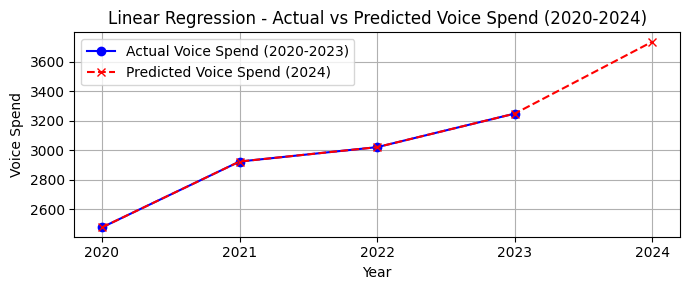

In [181]:
# Step 6: Plot the actual and predicted values without gaps
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Voice Spend (2020-2023)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Voice Spend (2024)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Voice Spend')
plt.title('Linear Regression - Actual vs Predicted Voice Spend (2020-2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [182]:
# Step 7: Model Evaluation
# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.08571099573268626
Mean Absolute Percentage Error (MAPE): 0.0018434764922683365
R-squared (R2): 0.9999999998406297


In [183]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual & Predicted Voice Spend for 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Predicted Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'EST_VOICE_SPEND_2024_Predicted': predictions['EST_VOICE_SPEND_2024']
}).sort_values(by='EST_VOICE_SPEND_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Actual Network Spend 2022
top_20_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'EST_VOICE_SPEND_2023': X_test['EST_VOICE_SPEND_2023']
}).sort_values(by='EST_VOICE_SPEND_2023', ascending=False).head(20)

# Calculate the total Actual spend for 2023 & Predicted spend for 2024
total_actual_spend_2023 = top_20_2023['EST_VOICE_SPEND_2023'].sum()
total_predicted_spend_2024 = top_20_2024['EST_VOICE_SPEND_2024_Predicted'].sum()

# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2023 = top_20_2023[top_20_2023['Business_Name'] != 'Grand Total']

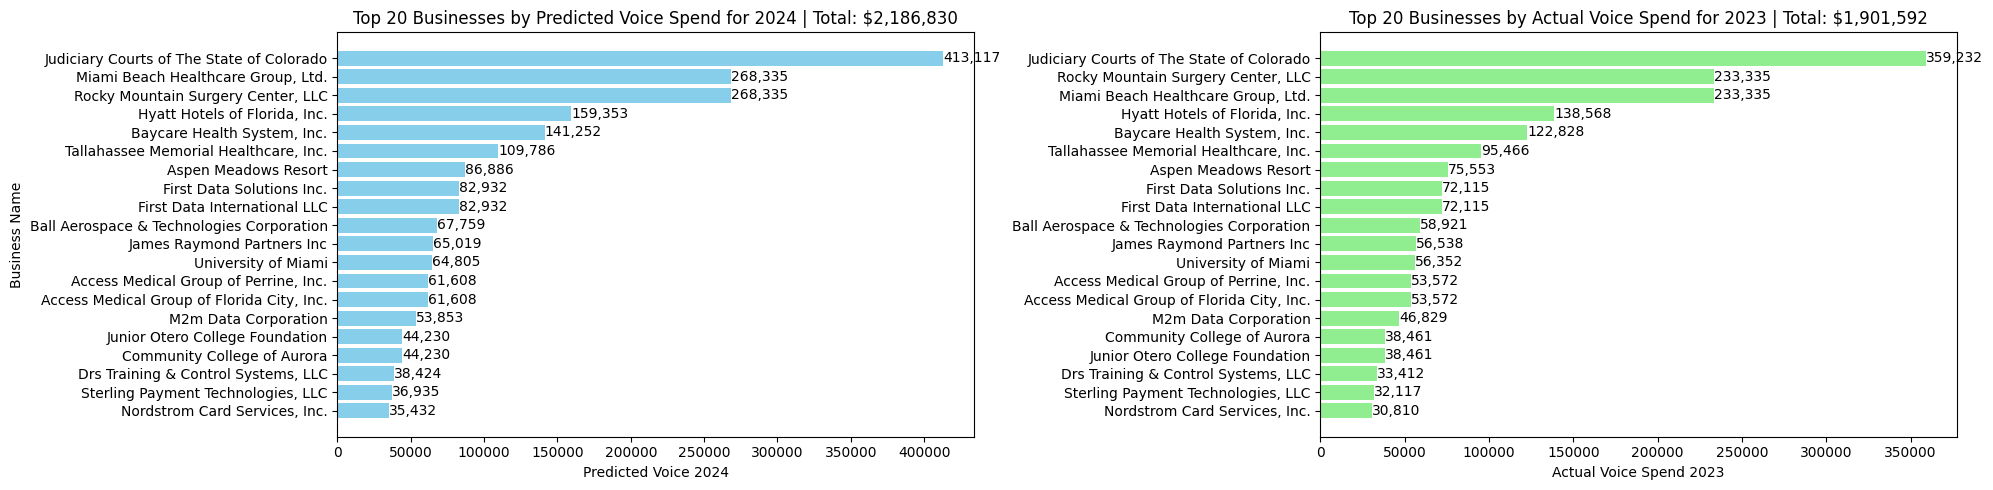

In [184]:
# Step7: Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['EST_VOICE_SPEND_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title(f'Top 20 Businesses by Predicted Voice Spend for 2024 | Total: ${total_predicted_spend_2024:,.0f}')
axes[0].set_xlabel('Predicted Voice 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2023 = axes[1].barh(top_20_2023['Business_Name'], top_20_2023['EST_VOICE_SPEND_2023'], color='lightgreen')

# Add values at the end of each bar for 2023
for bar in bars_2023:
    axes[1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
#axes[1].set_title('Top 20 Businesses by Actual Network Spend for 2023')
axes[1].set_title(f'Top 20 Businesses by Actual Voice Spend for 2023 | Total: ${total_actual_spend_2023:,.0f}')
axes[1].set_xlabel('Actual Voice Spend 2023')
axes[1].invert_yaxis()

# Adjust layout
plt.tight_layout()
plt.show()

In [185]:
# Step 2: Prepare data - Using Yearly Services spend data
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','EST_SERVICES_SPEND_2020', 'EST_SERVICES_SPEND_2021','EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2023']
target = ['EST_SERVICES_SPEND_2024']

In [186]:
# Step 3 - Initilize Linear Regression Model
X = data[features_lr]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
# Step 4: Forecasting for  2024
# Initialize the Linear Regression model
lr_model = LinearRegression()

In [188]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])
    y_pred = lr_model.predict(X_test)
    predictions[target_name] = y_pred

# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [189]:
# Step 5: Trend Line Chat (Both Actual & Predicted Revenue Years Data) - Combine actual values (2020-2023) and predicted values (2024) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_SERVICES_SPEND_2020'].values
values_actual_2021 = X_test['EST_SERVICES_SPEND_2021'].values
values_actual_2022 = X_test['EST_SERVICES_SPEND_2022'].values
values_actual_2023 = X_test['EST_SERVICES_SPEND_2023'].values
values_predicted_2024 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022','2023','2024']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean(),
    values_actual_2023.mean()
]

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

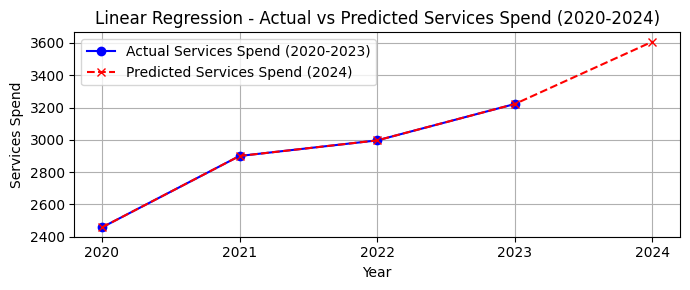

In [190]:
# Step 6: Plot the actual and predicted values without gaps
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Services Spend (2020-2023)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Services Spend (2024)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Services Spend')
plt.title('Linear Regression - Actual vs Predicted Services Spend (2020-2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [191]:
# Step 7: Model Evaluation

# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.05589202150830147
Mean Absolute Percentage Error (MAPE): 657808655590.7128
R-squared (R2): 0.9999999998546207


In [192]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual & Predicted Services Spend for 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Predicted Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_SERVICES_SPEND_2024_Predicted': predictions['EST_SERVICES_SPEND_2024']  # Predicted network spend for 2024
}).sort_values(by='EST_SERVICES_SPEND_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Actual Network Spend 2022
top_20_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'EST_SERVICES_SPEND_2023': X_test['EST_SERVICES_SPEND_2023']
}).sort_values(by='EST_SERVICES_SPEND_2023', ascending=False).head(20)

# Calculate the total Actual spend for 2023 & Predicted spend for 2024
total_actual_spend_2023 = top_20_2023['EST_SERVICES_SPEND_2023'].sum()
total_predicted_spend_2024 = top_20_2024['EST_SERVICES_SPEND_2024_Predicted'].sum()

# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2023 = top_20_2023[top_20_2023['Business_Name'] != 'Grand Total']

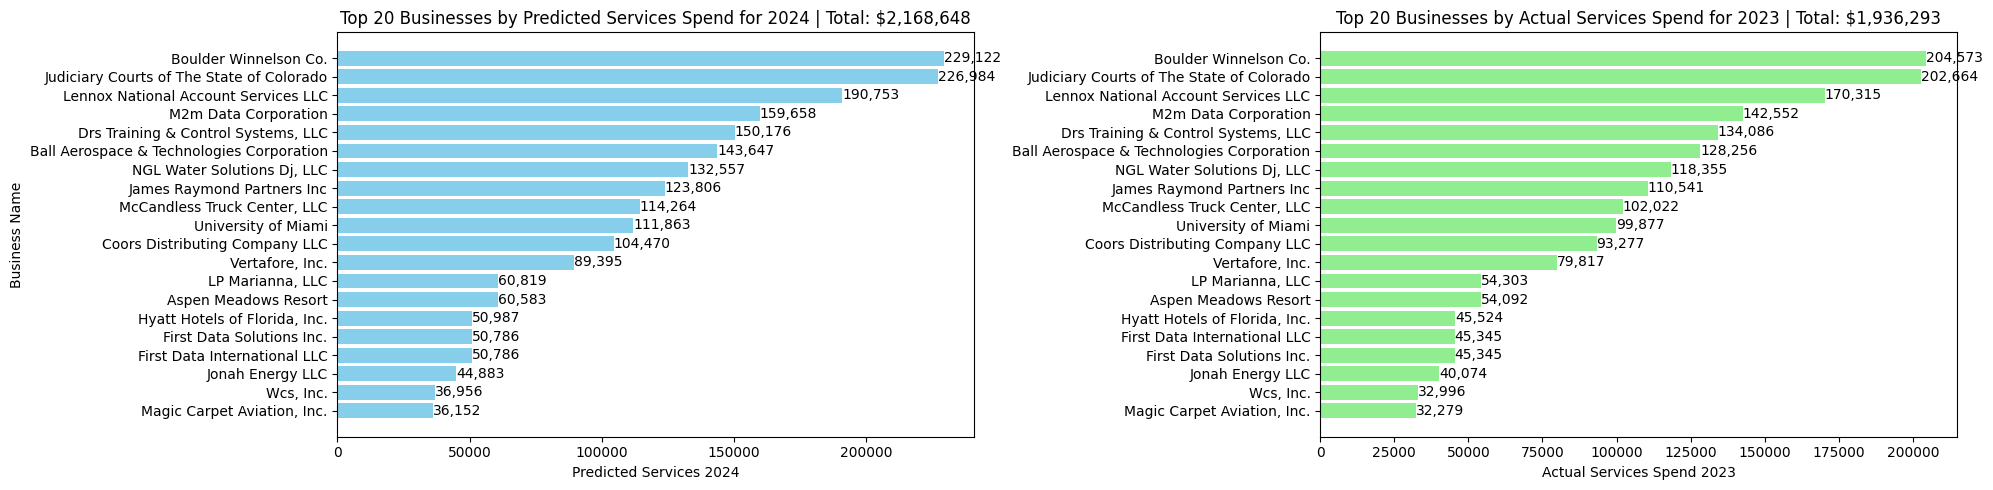

In [193]:
# Step7: Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Bar Graph for Top 20 Businesses by Predicted Services Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['EST_SERVICES_SPEND_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title(f'Top 20 Businesses by Predicted Services Spend for 2024 | Total: ${total_predicted_spend_2024:,.0f}')
axes[0].set_xlabel('Predicted Services 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2023 = axes[1].barh(top_20_2023['Business_Name'], top_20_2023['EST_SERVICES_SPEND_2023'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2023:
    axes[1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
#axes[1].set_title('Top 20 Businesses by Actual Network Spend for 2023')
axes[1].set_title(f'Top 20 Businesses by Actual Services Spend for 2023 | Total: ${total_actual_spend_2023:,.0f}')
axes[1].set_xlabel('Actual Services Spend 2023')
axes[1].invert_yaxis()

# Adjust layout
plt.tight_layout()
plt.show()

**Random Forest - Yearly Security Spend for 2024**

In [194]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [195]:
# Step1: Load the data
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
#print(data)

In [196]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [197]:
# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_rf = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_SECURITY_SPEND_2020', 'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2022','EST_SECURITY_SPEND_2023']
target = ['EST_SECURITY_SPEND_2024']

In [198]:
# Step3 - Prepration for RandomForest Model - Train-Test Split
X = data[features_rf]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [199]:
# Train the model for each target variable

predictions = {}
for target_name in target:
    rf_model.fit(X_train, y_train[target_name])
    y_pred = rf_model.predict(X_test)
    predictions[target_name] = y_pred

In [200]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [201]:
# Step4 - Trend Line Chat (Both Actual & Predicted Security Spend)
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_SECURITY_SPEND_2020'].values
values_actual_2021 = X_test['EST_SECURITY_SPEND_2021'].values
values_actual_2022 = X_test['EST_SECURITY_SPEND_2022'].values
values_actual_2023 = X_test['EST_SECURITY_SPEND_2023'].values
values_predicted_2024 = y_pred.flatten()

# Step 4: Prepare data for plotting
years = ['2020', '2021', '2022', '2023', '2024']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean(),
    values_actual_2023.mean()
]

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

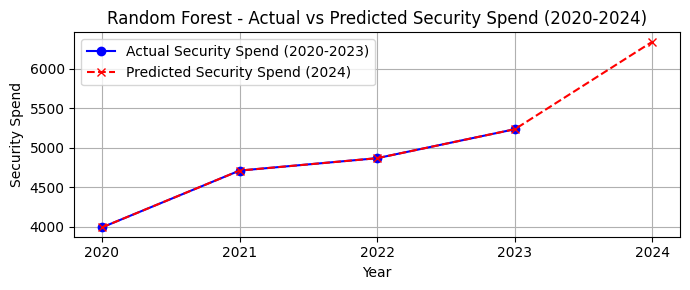

In [202]:
# Step 6: Plot the actual and predicted values without gaps
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Security Spend (2020-2023)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Security Spend (2024)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Security Spend')
plt.title('Random Forest - Actual vs Predicted Security Spend (2020-2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [203]:
# Step 5: Model Evaluation
# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 253554.35517049185
Mean Absolute Percentage Error (MAPE): 0.0011786496425368145
R-squared (R2): 0.9997664425836157


MSE (253,554.36): Relatively low, indicating small prediction errors in absolute terms.

MAPE (0.0012%): Extremely low, indicating excellent percentage accuracy.

R² (0.99977): Very high, meaning the model explains about 99.98% of the variance in the data.

In [204]:
#Step 6: Two 20 Business Bar graph (side by side) - Top 20 Business for Actual & Predicted Security Spend for Year 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_SECURITY_SPEND_2024_Predicted': predictions['EST_SECURITY_SPEND_2024']  # Predicted network spend for 2024
}).sort_values(by='EST_SECURITY_SPEND_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_SECURITY_SPEND_2022': X_test['EST_SECURITY_SPEND_2022']  # Actual network spend for 2022
}).sort_values(by='EST_SECURITY_SPEND_2022', ascending=False).head(20)

In [205]:
# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2022 = top_20_2022[top_20_2022['Business_Name'] != 'Grand Total']

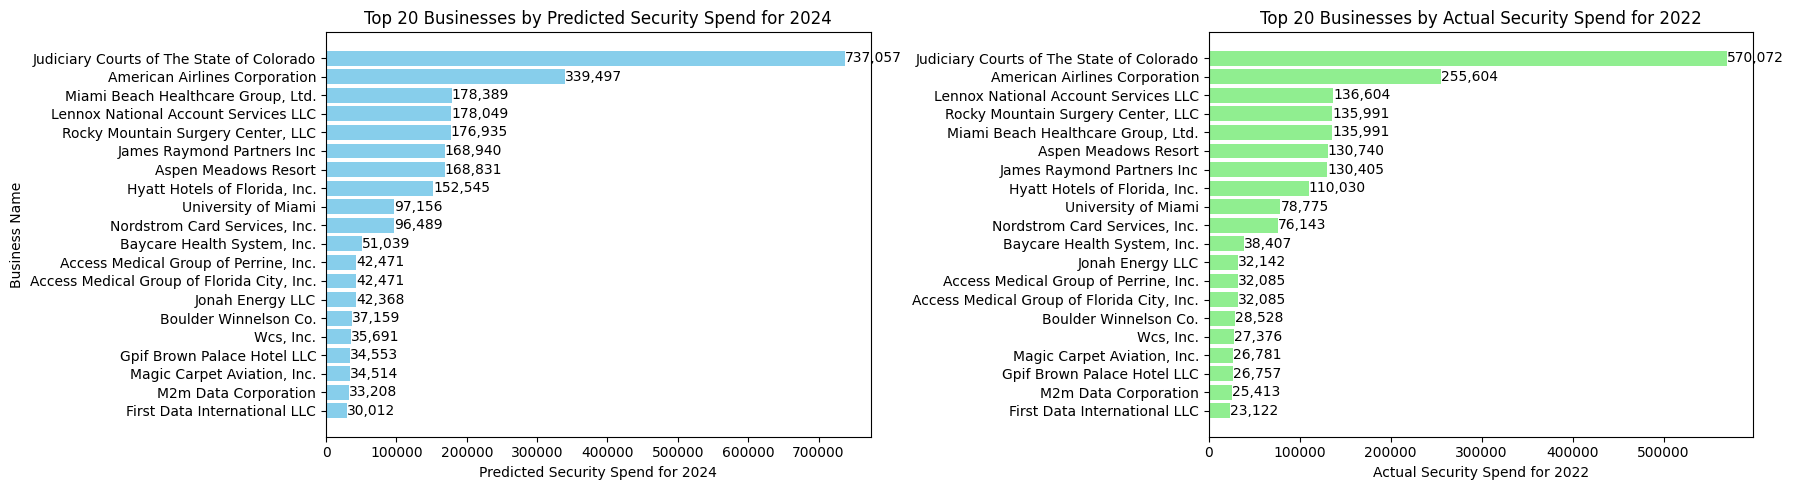

In [206]:
# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# Bar Graph for Top 20 Businesses by Predicted Security Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['EST_SECURITY_SPEND_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the first plot (Predicted Security Spend 2024)
axes[0].set_title('Top 20 Businesses by Predicted Security Spend for 2024')
axes[0].set_xlabel('Predicted Security Spend for 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses by Actual Security Spend for 2022
bars_2022 = axes[1].barh(top_20_2022['Business_Name'], top_20_2022['EST_SECURITY_SPEND_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2022:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Actual Security Spend 2022)
axes[1].set_title('Top 20 Businesses by Actual Security Spend for 2022')
axes[1].set_xlabel('Actual Security Spend for 2022')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout
plt.tight_layout()
plt.show()

**XGBoost - Predict Voice Spend for Year 2024**

In [207]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb

In [208]:
# Load the data
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data.columns)

Index(['Business_Name', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS',
       'REV_AMT_2022', 'REV_AMT_2021', 'REV_AMT_2020',
       'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
       'EST_NETWORK_SPEND_2020', 'EST_SECURITY_SPEND_2022',
       'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2020',
       'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
       'EST_SERVICES_SPEND_2020', 'EST_VOICE_SPEND_2022',
       'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2020',
       'EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023',
       'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023', 'REV_AMT_2023',
       'REV_AMT_2024', 'EST_NETWORK_SPEND_2024', 'EST_SECURITY_SPEND_2024',
       'EST_VOICE_SPEND_2024', 'EST_SERVICES_SPEND_2024'],
      dtype='object')


In [209]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [210]:
# Step 2: Prepare data
# Select the features and target variables (assumed the data has 2021 actuals and we are predicting for 2023)
features_xg = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_VOICE_SPEND_2020', 'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2022','EST_VOICE_SPEND_2023']
target = ['EST_VOICE_SPEND_2024']

# Step 4: Prepare data
# Assuming features_lr is already defined and contains the appropriate columns
X = data[features_xg]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
# Step3: Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [212]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    xgb_model.fit(X_train, y_train[target_name])
    y_pred = xgb_model.predict(X_test)
    predictions[target_name] = y_pred

In [213]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [214]:
# Step 5 - Trend Line Chat (Both Actual & Predicted Revenue Years Data) - Combine actual values (2020-2023) and predicted values (2024)
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_VOICE_SPEND_2020'].values
values_actual_2021 = X_test['EST_VOICE_SPEND_2021'].values
values_actual_2022 = X_test['EST_VOICE_SPEND_2022'].values
values_actual_2023 = X_test['EST_VOICE_SPEND_2023'].values
values_predicted_2024 = y_pred.flatten()

# Step 4: Prepare data for plotting
years = ['2020', '2021', '2022', '2023', '2024']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean(),
    values_actual_2023.mean()
]

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

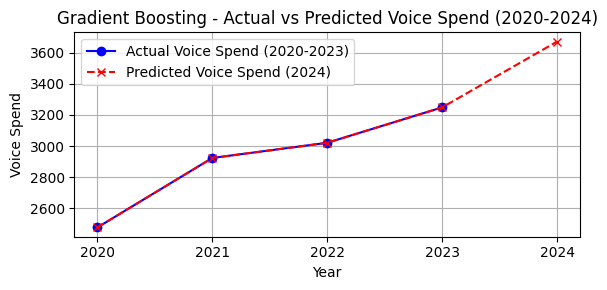

In [215]:
# Step 6: Plot the actual and predicted values without gaps
plt.figure(figsize=(6, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Voice Spend (2020-2023)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Voice Spend (2024)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Voice Spend')
plt.title('Gradient Boosting - Actual vs Predicted Voice Spend (2020-2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [216]:
# Step 4: Model Evaluation
# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 17651641.170691665
Mean Absolute Percentage Error (MAPE): 0.2091142799588413
R-squared (R2): 0.9671786790528524


In [217]:
#Step5 - Two 20 Business Bar graph (side by side) - Top 20 Business for Actual Voice Spend & Predicted Voice Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_VOICE_SPEND_2024_Predicted': predictions['EST_VOICE_SPEND_2024']  # Predicted network spend for 2024
}).sort_values(by='EST_VOICE_SPEND_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_VOICE_SPEND_2022': X_test['EST_VOICE_SPEND_2022']  # Actual network spend for 2022
}).sort_values(by='EST_VOICE_SPEND_2022', ascending=False).head(20)

In [218]:
# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2022 = top_20_2022[top_20_2022['Business_Name'] != 'Grand Total']

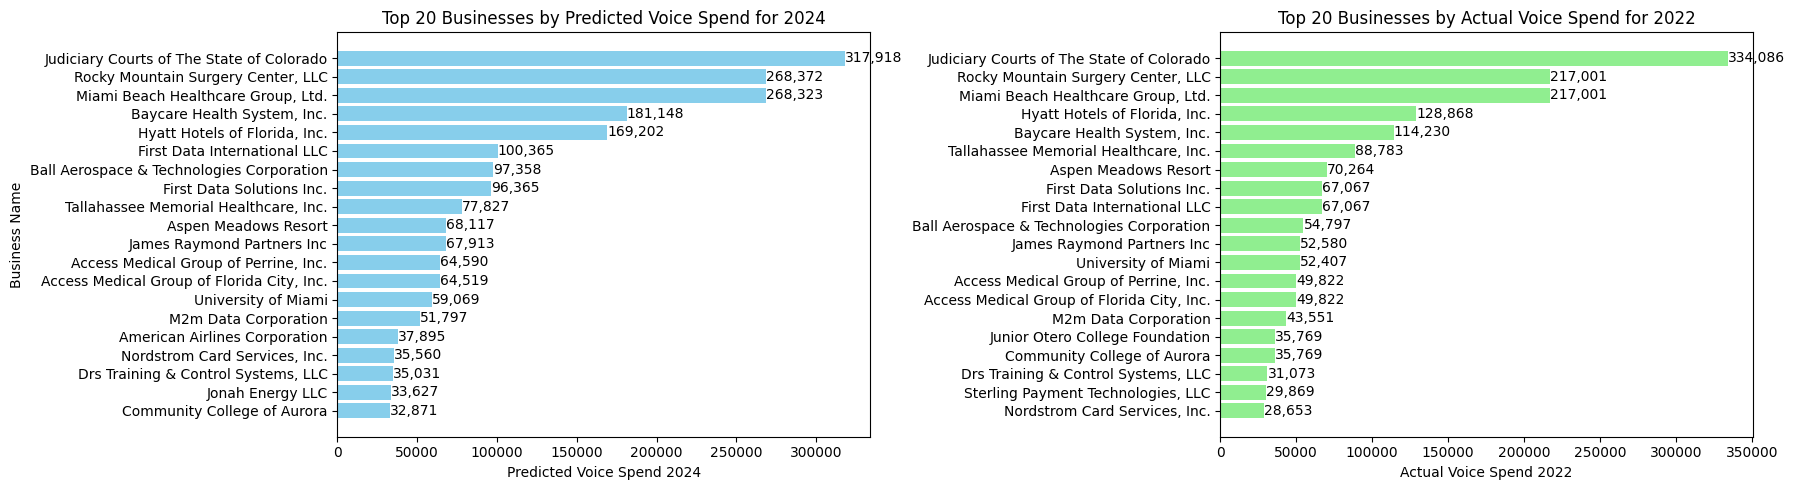

In [219]:
# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# Bar Graph for Top 20 Businesses by Predicted Voice Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['EST_VOICE_SPEND_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the first plot (Predicted Voice Spend 2024)
axes[0].set_title('Top 20 Businesses by Predicted Voice Spend for 2024')
axes[0].set_xlabel('Predicted Voice Spend 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses by Actual Voice Spend for 2022
bars_2022 = axes[1].barh(top_20_2022['Business_Name'], top_20_2022['EST_VOICE_SPEND_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2022:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
axes[1].set_title('Top 20 Businesses by Actual Voice Spend for 2022')
axes[1].set_xlabel('Actual Voice Spend 2022')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout
plt.tight_layout()
plt.show()

**Linear Regression - Yearly Services Spend for 2024**

In [220]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [221]:
# Load the data
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data.columns)

Index(['Business_Name', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS',
       'REV_AMT_2022', 'REV_AMT_2021', 'REV_AMT_2020',
       'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
       'EST_NETWORK_SPEND_2020', 'EST_SECURITY_SPEND_2022',
       'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2020',
       'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
       'EST_SERVICES_SPEND_2020', 'EST_VOICE_SPEND_2022',
       'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2020',
       'EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023',
       'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023', 'REV_AMT_2023',
       'REV_AMT_2024', 'EST_NETWORK_SPEND_2024', 'EST_SECURITY_SPEND_2024',
       'EST_VOICE_SPEND_2024', 'EST_SERVICES_SPEND_2024'],
      dtype='object')


In [222]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [223]:
# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
# Select the features and target variables (assumed the data has 2021 actuals and we are predicting for 2023)
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'EST_SERVICES_SPEND_2020', 'EST_SERVICES_SPEND_2021', 'EST_SERVICES_SPEND_2022','EST_SERVICES_SPEND_2023']
target = ['EST_SERVICES_SPEND_2024']

In [224]:
# Step 3: Prepare data
# Assuming features_lr is already defined and contains the appropriate columns
X = data[features_lr]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
# Step 4: Forecasting for all four Years till 2024
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])
    y_pred = lr_model.predict(X_test)
    predictions[target_name] = y_pred

In [226]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [227]:
# Step 5: Trend Line Chat (Both Actual & Predicted Revenue Years Data) - Combine actual values (2020-2023) and predicted values (2024)
# The actual values will be taken from the test set
values_actual_2020 = X_test['EST_SERVICES_SPEND_2020'].values
values_actual_2021 = X_test['EST_SERVICES_SPEND_2021'].values
values_actual_2022 = X_test['EST_SERVICES_SPEND_2022'].values
values_actual_2023 = X_test['EST_SERVICES_SPEND_2023'].values
values_predicted_2024 = y_pred.flatten()

# Prepare data for plotting
years = ['2020', '2021', '2022', '2023', '2024']

actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean(),
    values_actual_2023.mean()
]

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

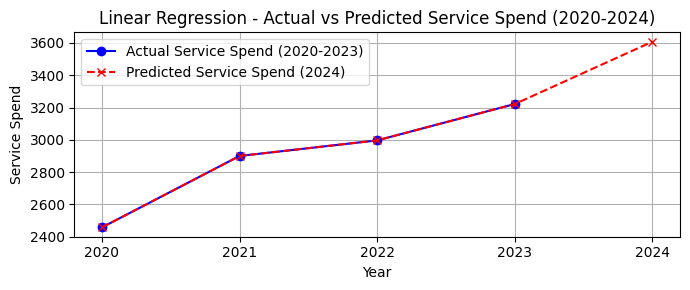

In [228]:
# Step 6: Plot the actual and predicted values without gaps
plt.figure(figsize=(7, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Service Spend (2020-2023)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Service Spend (2024)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Service Spend')
plt.title('Linear Regression - Actual vs Predicted Service Spend (2020-2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [229]:
# Step 6: Model Evaluation
# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.05589202150830147
Mean Absolute Percentage Error (MAPE): 657808655590.7128
R-squared (R2): 0.9999999998546207


MSE (0.0559): Very low, indicating minimal prediction errors.

MAPE (657.81 billion%): Extremely high, suggesting massive percentage errors, likely due to very small actual values or outliers.

R² (0.99999999985): Almost perfect, indicating the model explains nearly all the variance in the data.

In [230]:
#Step 7 - Two 20 Business Bar graph (side by side) - Top 20 Business for Actual Services Spend & Predicted Services Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_SERVICES_SPEND_2024_Predicted': predictions['EST_SERVICES_SPEND_2024']  # Predicted network spend for 2024
}).sort_values(by='EST_SERVICES_SPEND_2024_Predicted', ascending=False).head(20)

# Calculate the total predicted spend for 2024
total_predicted_spend_2024 = top_20_2024['EST_SERVICES_SPEND_2024_Predicted'].sum()

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'EST_SERVICES_SPEND_2023': X_test['EST_SERVICES_SPEND_2023']  # Actual network spend for 2022
}).sort_values(by='EST_SERVICES_SPEND_2023', ascending=False).head(20)

In [231]:
# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2023 = top_20_2023[top_20_2023['Business_Name'] != 'Grand Total']

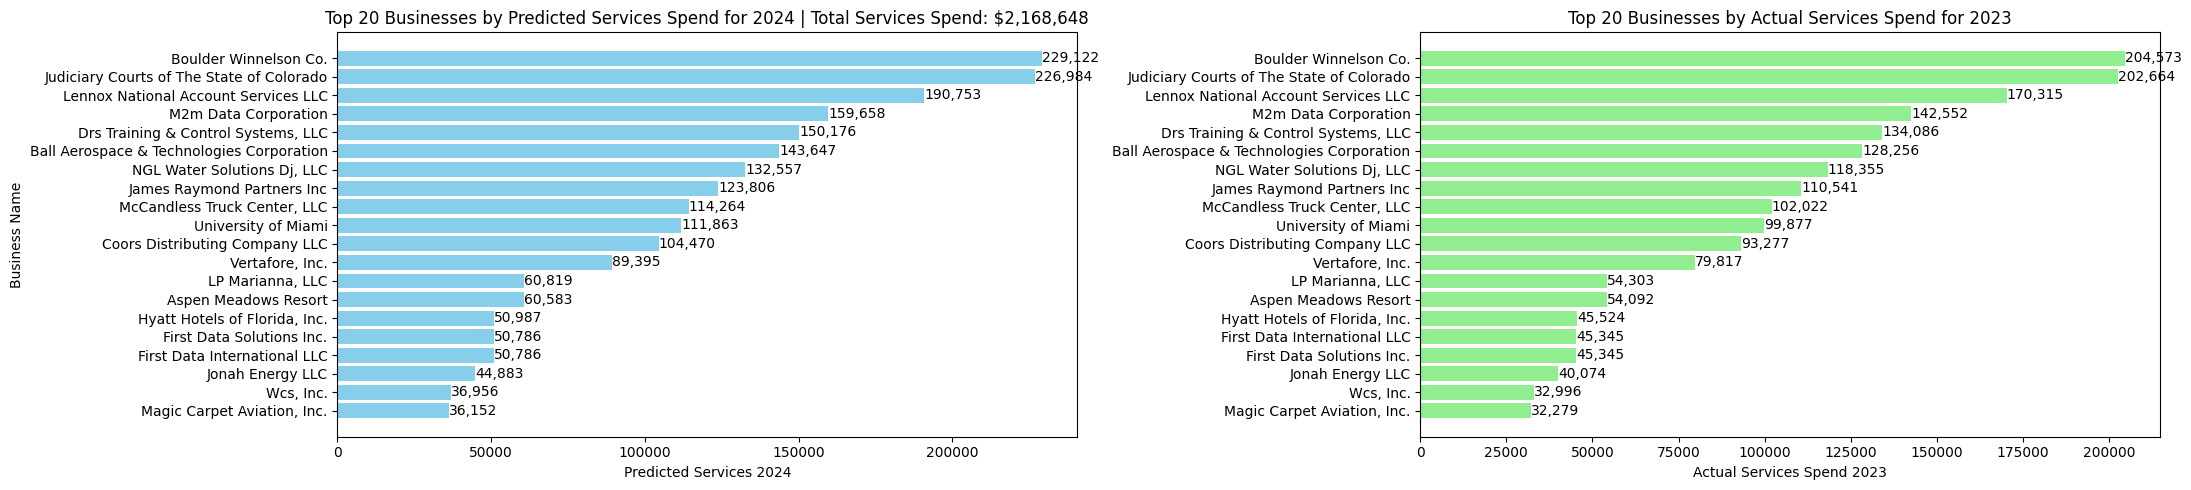

In [232]:
# Step7: Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 5))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['EST_SERVICES_SPEND_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title(f'Top 20 Businesses by Predicted Services Spend for 2024 | Total Services Spend: ${total_predicted_spend_2024:,.0f}')
axes[0].set_xlabel('Predicted Services 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2023 = axes[1].barh(top_20_2023['Business_Name'], top_20_2023['EST_SERVICES_SPEND_2023'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2023:
    axes[1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
axes[1].set_title('Top 20 Businesses by Actual Services Spend for 2023')
axes[1].set_xlabel('Actual Services Spend 2023')
axes[1].invert_yaxis()

# Adjust layout
plt.tight_layout()
plt.show()

**Linear Regression - Revenue Prediction for 2023**

In [233]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [234]:
# Load the data
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data.columns)

Index(['Business_Name', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS',
       'REV_AMT_2022', 'REV_AMT_2021', 'REV_AMT_2020',
       'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
       'EST_NETWORK_SPEND_2020', 'EST_SECURITY_SPEND_2022',
       'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2020',
       'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
       'EST_SERVICES_SPEND_2020', 'EST_VOICE_SPEND_2022',
       'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2020',
       'EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023',
       'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023', 'REV_AMT_2023',
       'REV_AMT_2024', 'EST_NETWORK_SPEND_2024', 'EST_SECURITY_SPEND_2024',
       'EST_VOICE_SPEND_2024', 'EST_SERVICES_SPEND_2024'],
      dtype='object')


In [235]:
# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','REV_AMT_2020', 'REV_AMT_2021','REV_AMT_2022']
target = ['REV_AMT_2023']

In [236]:
# Step 3: Prepare data
# Assuming features_lr is already defined and contains the appropriate columns
X = data[features_lr]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())

EMPLOYEES_HERE     0
EMPLOYEES_TOTAL    0
ACTIVE_LOC_EMPS    0
REV_AMT_2020       0
REV_AMT_2021       0
REV_AMT_2022       0
dtype: int64


In [238]:
# Step 4: Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = lr_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [239]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [240]:
# Combine actual values (2020-2022) and predicted values (2023) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['REV_AMT_2020'].values
values_actual_2021 = X_test['REV_AMT_2021'].values
values_actual_2022 = X_test['REV_AMT_2022'].values
values_predicted_2023 = y_pred.flatten()

# Step 4: Prepare data for plotting
years = ['2020', '2021', '2022', '2023']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean()
]
# Include the predicted value at the end
all_values = actual_values + [values_predicted_2023.mean()]

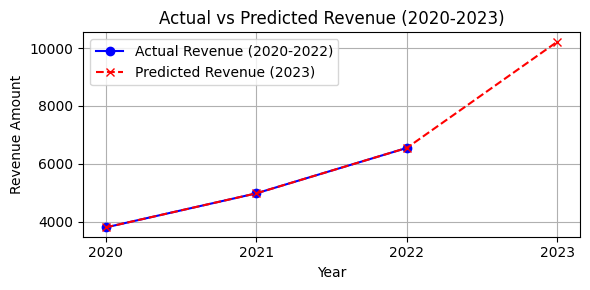

In [241]:
# Step 6: Plot the actual and predicted values without gaps
plt.figure(figsize=(6, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Revenue (2020-2022)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Revenue (2023)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Revenue Amount')
plt.title('Actual vs Predicted Revenue (2020-2023)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [242]:
# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1.0969026245437998
Mean Absolute Percentage Error (MAPE): 103012071692.30142
R-squared (R2): 0.9999999983921504


In [243]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual Network Spend & Predicted Network Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'REV_AMT_2023_Predicted': predictions['REV_AMT_2023']
}).sort_values(by='REV_AMT_2023_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'REV_AMT_2022': X_test['REV_AMT_2022']
}).sort_values(by='REV_AMT_2022', ascending=False).head(20)

# Remove any rows with 'Grand Total' if present
top_20_2023 = top_20_2023[top_20_2023['Business_Name'] != 'Grand Total']
top_20_2022 = top_20_2022[top_20_2022['Business_Name'] != 'Grand Total']

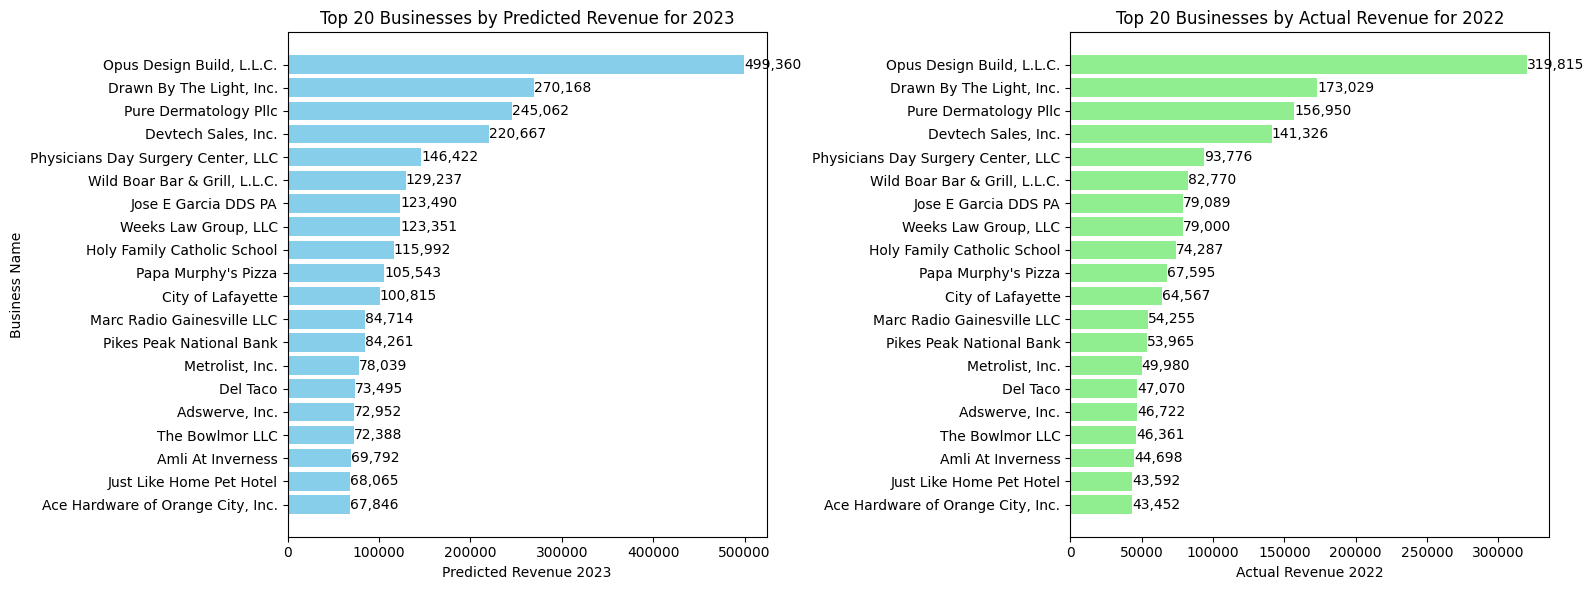

In [244]:
# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2023 = axes[0].barh(top_20_2023['Business_Name'], top_20_2023['REV_AMT_2023_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2023:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title('Top 20 Businesses by Predicted Revenue for 2023')
axes[0].set_xlabel('Predicted Revenue 2023')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2022 = axes[1].barh(top_20_2022['Business_Name'], top_20_2022['REV_AMT_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2022:
    axes[1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
axes[1].set_title('Top 20 Businesses by Actual Revenue for 2022')
axes[1].set_xlabel('Actual Revenue 2022')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout
plt.tight_layout()
plt.show()

**Linear Regression - Revenue Forecast for 2024**

In [245]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [246]:
# Load the data
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data.columns)

Index(['Business_Name', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS',
       'REV_AMT_2022', 'REV_AMT_2021', 'REV_AMT_2020',
       'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
       'EST_NETWORK_SPEND_2020', 'EST_SECURITY_SPEND_2022',
       'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2020',
       'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
       'EST_SERVICES_SPEND_2020', 'EST_VOICE_SPEND_2022',
       'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2020',
       'EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023',
       'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023', 'REV_AMT_2023',
       'REV_AMT_2024', 'EST_NETWORK_SPEND_2024', 'EST_SECURITY_SPEND_2024',
       'EST_VOICE_SPEND_2024', 'EST_SERVICES_SPEND_2024'],
      dtype='object')


In [247]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [248]:
# Step 2: Prepare data
features_lr = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','REV_AMT_2020', 'REV_AMT_2021','REV_AMT_2022', 'REV_AMT_2023']
target = ['REV_AMT_2024']

In [249]:
# Step 3: Import necessary libraries for building model & evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [250]:
# Step 4: Prepare data Regression Model
X = data[features_lr]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())

EMPLOYEES_HERE     0
EMPLOYEES_TOTAL    0
ACTIVE_LOC_EMPS    0
REV_AMT_2020       0
REV_AMT_2021       0
REV_AMT_2022       0
REV_AMT_2023       0
dtype: int64


In [252]:
# Step 5: Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])
    y_pred = lr_model.predict(X_test)
    predictions[target_name] = y_pred

In [253]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [254]:
# Create a new DataFrame with 'BUS_NAME' as the first column
bus_name_series = data['Business_Name'][X_test.index]
average_df_with_busname = pd.DataFrame({'Business_Name': bus_name_series})

# Create average_df
average_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

# Concatenate the original average_df with the 'BUS_NAME' column
average_df_with_busname = pd.concat([average_df_with_busname, average_df], axis=1)

# Display the average values along with the BUSNAME
print(average_df_with_busname)

                         Business_Name  REV_AMT_2024
168            All Copy Products, Inc.          8244
2036        Hillside Family Apartments          1939
4204        Triumph Capital Management          5381
826                 Chuck E Cheese 804            99
371   Automotive Warranty Network, Inc          3370
...                                ...           ...
844                    City of Alamosa         10766
4257                    Unico Tech LLC         10313
4402          Water Valley Dental Pllc          1138
4364  Vita Inclinata Techologies, Inc.          3289
1613           Fisher Dr Nancy Carlson         76108

[793 rows x 2 columns]


In [255]:
# Combine actual values (2020-2023) and predicted values (2024) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['REV_AMT_2020'].values
values_actual_2021 = X_test['REV_AMT_2021'].values
values_actual_2022 = X_test['REV_AMT_2022'].values
values_actual_2023 = X_test['REV_AMT_2023'].values
values_predicted_2024 = y_pred.flatten()

# Step 4: Prepare data for plotting
years = ['2020', '2021', '2022', '2023', '2024']

In [256]:
# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean(),
    values_actual_2023.mean()
]

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

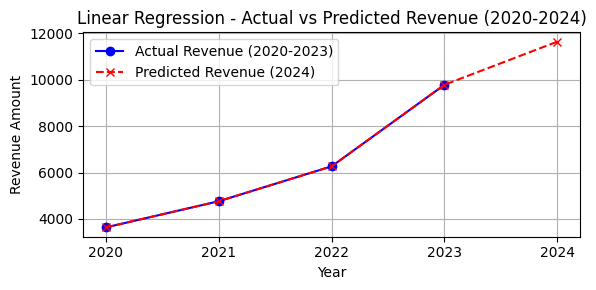

In [257]:
# Step 6: Plot the actual and predicted values without gaps
plt.figure(figsize=(6, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Revenue (2020-2023)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Revenue (2024)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Revenue Amount')
plt.title('Linear Regression - Actual vs Predicted Revenue (2020-2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [258]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.08426892636481317
Mean Absolute Percentage Error (MAPE): 54042418559.269844
R-squared (R2): 0.999999999897193


MSE (0.0843): Very low, indicating minimal prediction errors.

MAPE (54.04 billion%): Exceptionally high, suggesting large percentage errors, likely due to small actual values or outliers.

R² (0.9999999999): Almost perfect, showing the model explains nearly all the variance in the data.

In [259]:
# Create a DataFrame with the required columns - Top 20 Business having Network Spend
top_20_summary_df = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index].head(20),
    'REV_AMT_2023': X_test['REV_AMT_2023'].head(20),
    'REV_AMT_2024_Predicted': predictions['REV_AMT_2024'][:20]
})

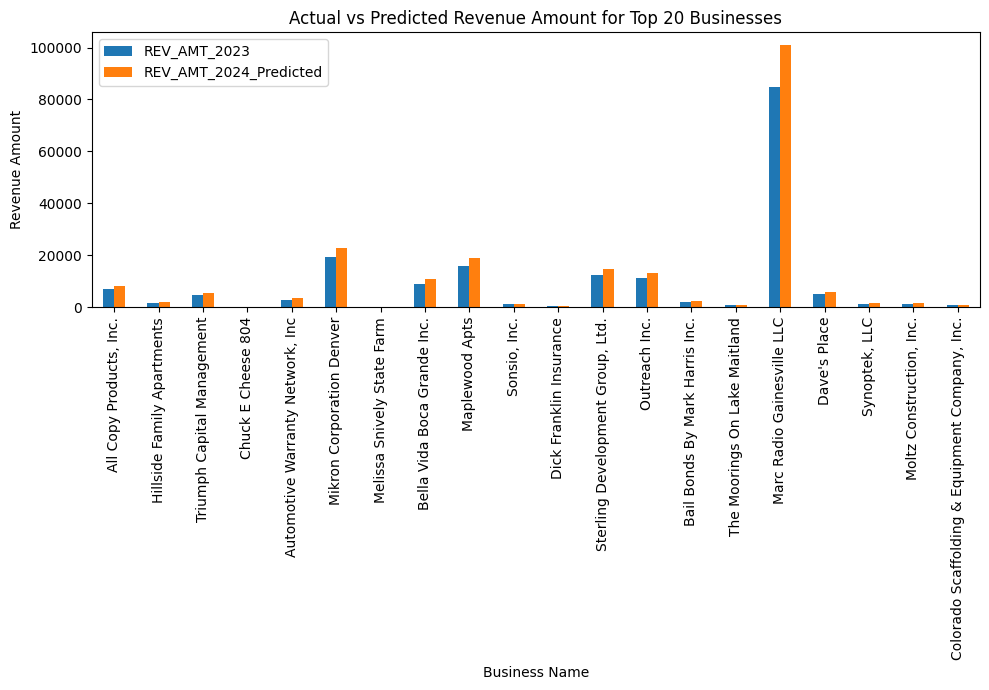

In [260]:
# Optionally visualize in a bar graph
import matplotlib.pyplot as plt

# Plotting the actual vs predicted network spend for the top 20 businesses
top_20_summary_df.set_index('Business_Name')[['REV_AMT_2023', 'REV_AMT_2024_Predicted']].plot(kind='bar', figsize=(10, 7))

# Customize the plot
plt.xlabel('Business Name')
plt.ylabel('Revenue Amount')
plt.title('Actual vs Predicted Revenue Amount for Top 20 Businesses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [261]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual Network Spend & Predicted Network Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Revenue 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'REV_AMT_2024_Predicted': predictions['REV_AMT_2024']
}).sort_values(by='REV_AMT_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Revenue 2023
top_20_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'REV_AMT_2023': X_test['REV_AMT_2023']
}).sort_values(by='REV_AMT_2023', ascending=False).head(20)

# Calculate the total Actual spend for 2023 & Predicted spend for 2024
total_actual_revenue_2023 = top_20_2023['REV_AMT_2023'].sum()
total_predicted_revenue_2024 = top_20_2024['REV_AMT_2024_Predicted'].sum()

# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2023 = top_20_2023[top_20_2023['Business_Name'] != 'Grand Total']

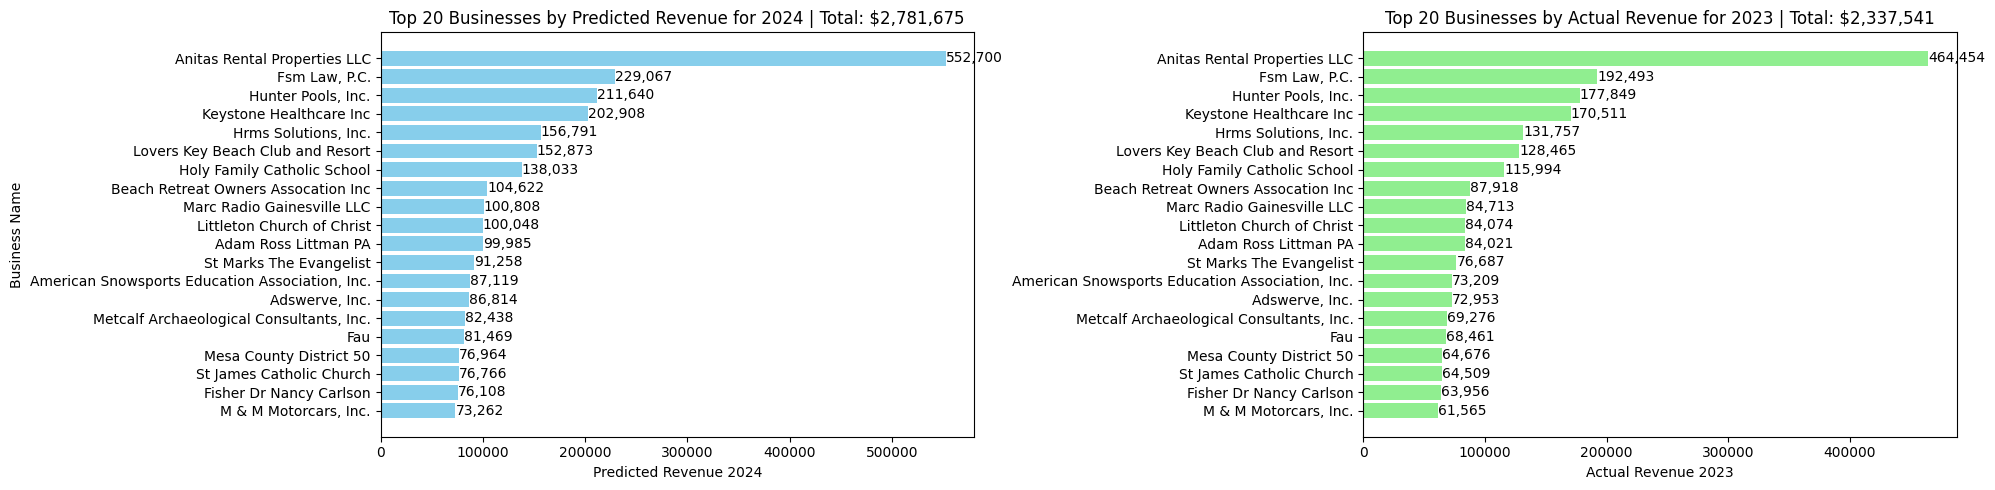

In [262]:
# Step7: Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['REV_AMT_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title(f'Top 20 Businesses by Predicted Revenue for 2024 | Total: ${total_predicted_revenue_2024:,.0f}')
axes[0].set_xlabel('Predicted Revenue 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2023 = axes[1].barh(top_20_2023['Business_Name'], top_20_2023['REV_AMT_2023'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2023:
    axes[1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
#axes[1].set_title('Top 20 Businesses by Actual Network Spend for 2023')
axes[1].set_title(f'Top 20 Businesses by Actual Revenue for 2023 | Total: ${total_actual_revenue_2023:,.0f}')
axes[1].set_xlabel('Actual Revenue 2023')
axes[1].invert_yaxis()

# Adjust layout
plt.tight_layout()
plt.show()

**Random Forest - Revenue Forecast for 2024**

In [263]:
# Import necessary libraries for Random Forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [264]:
# Load the data
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data.columns)

Index(['Business_Name', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS',
       'REV_AMT_2022', 'REV_AMT_2021', 'REV_AMT_2020',
       'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
       'EST_NETWORK_SPEND_2020', 'EST_SECURITY_SPEND_2022',
       'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2020',
       'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
       'EST_SERVICES_SPEND_2020', 'EST_VOICE_SPEND_2022',
       'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2020',
       'EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023',
       'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023', 'REV_AMT_2023',
       'REV_AMT_2024', 'EST_NETWORK_SPEND_2024', 'EST_SECURITY_SPEND_2024',
       'EST_VOICE_SPEND_2024', 'EST_SERVICES_SPEND_2024'],
      dtype='object')


In [265]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [266]:
# Step 2: Prepare data for Model Build
features_rf = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','REV_AMT_2020', 'REV_AMT_2021','REV_AMT_2022', 'REV_AMT_2023']
target = ['REV_AMT_2024']

In [267]:
# Assuming features_rf is already defined and contains the appropriate columns
X = data[features_rf]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
# Once again remove rows with any null values from Traing & Test data
X_train = X_train.dropna()
y_train = y_train.dropna()

In [269]:
# prompt: # Initialize the Random Forest Regression model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [270]:
# prompt: # Train the model for each target variable
predictions = {}
for target_name in target:
    rf_model.fit(X_train, y_train[target_name])
    y_pred = rf_model.predict(X_test)
    predictions[target_name] = y_pred

In [271]:
# Trend Line Chat (Both Actual & Predicted Revenue Years Data) - combine actual values (2020-2023) and predicted values (2024) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['REV_AMT_2020'].values
values_actual_2021 = X_test['REV_AMT_2021'].values
values_actual_2022 = X_test['REV_AMT_2022'].values
values_actual_2023 = X_test['REV_AMT_2023'].values
values_predicted_2024 = y_pred.flatten()

# Step 4: Prepare data for plotting
years = ['2020', '2021', '2022', '2023', '2024']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean(),
    values_actual_2023.mean()
]

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

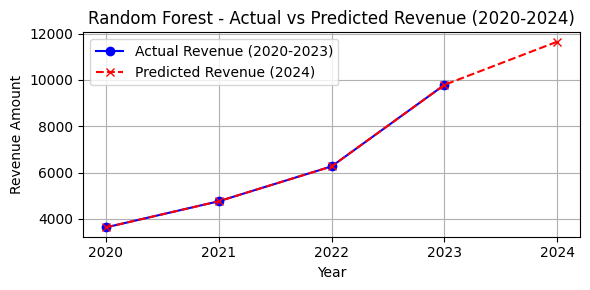

In [272]:
# Step 6: Plot the actual and predicted values without gaps
plt.figure(figsize=(6, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Revenue (2020-2023)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Revenue (2024)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Revenue Amount')
plt.title('Random Forest - Actual vs Predicted Revenue (2020-2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [273]:
# Model Evaluation - Calculate (MSE), (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.08426892636481317
Mean Absolute Percentage Error (MAPE): 54042418559.269844
R-squared (R2): 0.999999999897193


  Mean Squared Error (MSE): 0.084 – This is very low, indicating that the average squared difference between actual and predicted values is minimal, meaning predictions are very close to the actual values.

  Mean Absolute Percentage Error (MAPE): 54,042,418,559.27% – This is an extremely large value, suggesting significant percentage errors, which might be due to scaling issues or large differences between predicted and actual values in some cases.

  R-squared (R²): 0.9999999999 – This indicates an almost perfect fit, meaning 99.99999999% of the variance in the data is explained by the model.

**In summary**, while the model seems to have a near-perfect fit with a very low MSE and high R², the MAPE indicates possible issues with percentage errors, potentially signaling outliers or data imbalance.

In [274]:
#Two 20 Business Bar graph (side by side) - Top 20 Business having High Revenue for Actual year 2023 and for Future year 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business having High Revenue for 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'REV_AMT_2024_Predicted': predictions['REV_AMT_2024']
}).sort_values(by='REV_AMT_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business having High Revenue for 2023
top_20_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'REV_AMT_2023': X_test['REV_AMT_2023']
}).sort_values(by='REV_AMT_2023', ascending=False).head(20)

In [275]:
# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2023 = top_20_2023[top_20_2023['Business_Name'] != 'Grand Total']

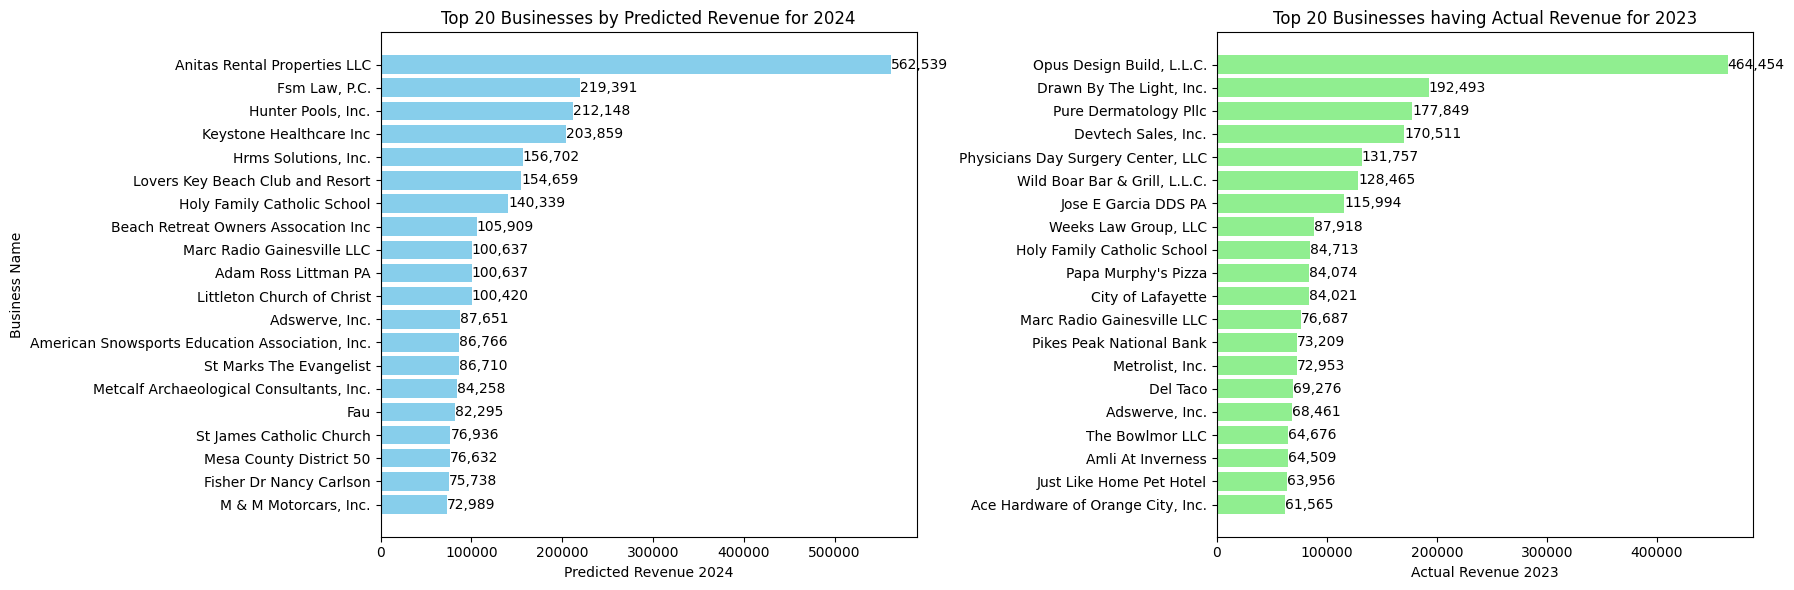

In [276]:
# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Bar Graph for Top 20 Businesses having high predicted Revenue for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['REV_AMT_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Predicted Revenue for Year 2024)
axes[0].set_title('Top 20 Businesses by Predicted Revenue for 2024')
axes[0].set_xlabel('Predicted Revenue 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses having Actual high Revenue for Year 2022
bars_2023 = axes[1].barh(top_20_2022['Business_Name'], top_20_2023['REV_AMT_2023'], color='lightgreen')

# Add values at the end of each bar for 2023
for bar in bars_2023:
    axes[1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
axes[1].set_title('Top 20 Businesses having Actual Revenue for 2023')
axes[1].set_xlabel('Actual Revenue 2023')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout
plt.tight_layout()
plt.show()

**XGBoost - Revenue Forecast for 2024**

In [277]:
# Import necessary libraries for XGBoost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [278]:
# Load the data
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data.columns)

Index(['Business_Name', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS',
       'REV_AMT_2022', 'REV_AMT_2021', 'REV_AMT_2020',
       'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
       'EST_NETWORK_SPEND_2020', 'EST_SECURITY_SPEND_2022',
       'EST_SECURITY_SPEND_2021', 'EST_SECURITY_SPEND_2020',
       'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
       'EST_SERVICES_SPEND_2020', 'EST_VOICE_SPEND_2022',
       'EST_VOICE_SPEND_2021', 'EST_VOICE_SPEND_2020',
       'EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023',
       'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023', 'REV_AMT_2023',
       'REV_AMT_2024', 'EST_NETWORK_SPEND_2024', 'EST_SECURITY_SPEND_2024',
       'EST_VOICE_SPEND_2024', 'EST_SERVICES_SPEND_2024'],
      dtype='object')


In [279]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

# Step 2: Prepare data
features_xgb = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS','REV_AMT_2020', 'REV_AMT_2021','REV_AMT_2022', 'REV_AMT_2023']
target = ['REV_AMT_2024']

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
REV_AMT_2022                 0
REV_AMT_2021                 0
REV_AMT_2020                 0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_NETWORK_SPEND_2020       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SECURITY_SPEND_2020      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_SERVICES_SPEND_2020      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_VOICE_SPEND_2020         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
REV_AMT_2023                 0
REV_AMT_2024                 0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64


In [280]:
# Step 4: Prepare data
X = data[features_xgb]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [281]:
# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())

EMPLOYEES_HERE     0
EMPLOYEES_TOTAL    0
ACTIVE_LOC_EMPS    0
REV_AMT_2020       0
REV_AMT_2021       0
REV_AMT_2022       0
REV_AMT_2023       0
dtype: int64


In [282]:
# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [283]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    xgb_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = xgb_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [284]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [285]:
# Trend Line Chat (Both Actual & Predicted Revenue Data) - Combine actual values (2020-2023) and predicted values (2024) for all samples
# The actual values will be taken from the test set
values_actual_2020 = X_test['REV_AMT_2020'].values
values_actual_2021 = X_test['REV_AMT_2021'].values
values_actual_2022 = X_test['REV_AMT_2022'].values
values_actual_2023 = X_test['REV_AMT_2023'].values
values_predicted_2024 = y_pred.flatten()

# Step 4: Prepare data for plotting
years = ['2020', '2021', '2022', '2023', '2024']

# Plot for all samples, we will plot the mean for simplicity
actual_values = [
    values_actual_2020.mean(),
    values_actual_2021.mean(),
    values_actual_2022.mean(),
    values_actual_2023.mean()
]

# Include the predicted value at the end
all_values = actual_values + [values_predicted_2024.mean()]

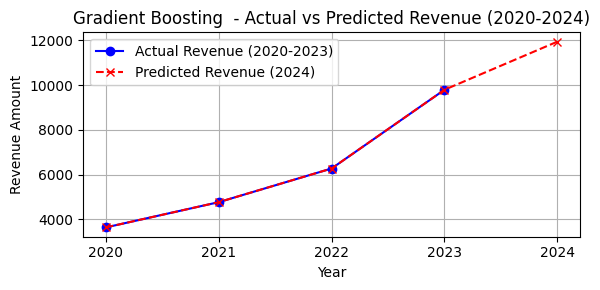

In [286]:
# Step 6: Plot the actual and predicted values without gaps
plt.figure(figsize=(6, 3))

# Plot actual values in blue
plt.plot(years[:-1], actual_values, marker='o', color='blue', label='Actual Revenue (2020-2023)')

# Plot predicted values in red and extend the line
plt.plot(years, all_values, marker='x', color='red', linestyle='--', label='Predicted Revenue (2024)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Revenue Amount')
plt.title('Gradient Boosting  - Actual vs Predicted Revenue (2020-2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [287]:
# Now Evaluate the Model performance:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100}%')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 80001233.17233829
Mean Absolute Percentage Error (MAPE): 4.312375074671787e+16%
R-squared (R²): 0.9023995995521545


    
Mean Squared Error (MSE): 80,001,233.17 – This indicates the average squared difference between the actual and predicted values. A lower value is better, but this value seems quite high, suggesting significant errors.

Mean Absolute Percentage Error (MAPE): 4.31e+16% – This is extremely large, indicating poor accuracy in terms of percentage error between predictions and actual values.

R-squared (R²): 0.902 – This value shows that 90.2% of the variance in the data is explained by the model, which indicates a good fit overall.

However, despite the high R², the large MAPE suggests the model might not generalize well or could have issues with outliers.

In [288]:
#Two 20 Business Bar graph (side by side) - Top 20 High Revenue Business for 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'REV_AMT_2024_Predicted': predictions['REV_AMT_2024']
}).sort_values(by='REV_AMT_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2023 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],
    'REV_AMT_2023': X_test['REV_AMT_2023']
}).sort_values(by='REV_AMT_2023', ascending=False).head(20)

In [289]:
# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2023 = top_20_2023[top_20_2023['Business_Name'] != 'Grand Total']

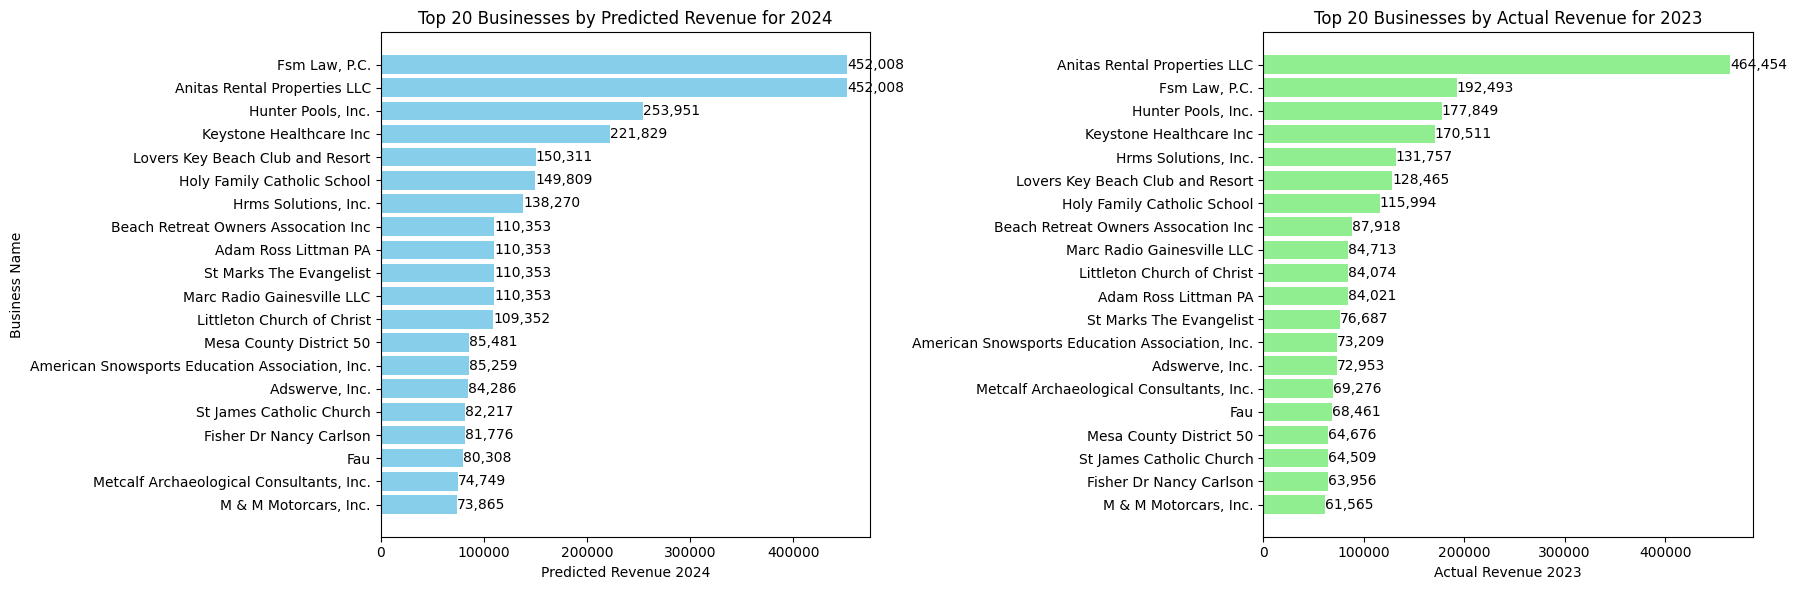

In [290]:
# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['REV_AMT_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title('Top 20 Businesses by Predicted Revenue for 2024')
axes[0].set_xlabel('Predicted Revenue 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2023 = axes[1].barh(top_20_2023['Business_Name'], top_20_2023['REV_AMT_2023'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2023:
    axes[1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():,.0f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
axes[1].set_title('Top 20 Businesses by Actual Revenue for 2023')
axes[1].set_xlabel('Actual Revenue 2023')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout
plt.tight_layout()
plt.show()

**THANK YOU**